### <i>LouvainDP Algorithm</i> 
`LouvainDP(G, k, epsilon)`

---
#### <i>Input:</i>
- <i>G</i> : input graph  
- <i>k</i> : group size to create supernodes  
- <i>ε (epsilon)</i> : privacy budget  

#### <i>Output:</i>
- <i>C</i> : the noisy partition of the graph into communities  

---

#### <i>Algorithm:</i>
1. Import the graph $G$.  
2. Initialize a new graph $G_1$ with $n_1$ nodes and $v_1$ edges.  
3. Initialize $\epsilon$, $\epsilon_1$, and $\alpha .$  
4. Get a random permutation of edges.  
5. Calculate $m_1$, $m_0$, $\theta$, and $s$.  
6. Add noise to the edges.  
7. Run the Louvain method.  


In [1]:
import os
import random
from louvainDP import LouvainDP
from utils import intro, graph_info, cluster_analysis
from dotenv import load_dotenv

import numpy as np
import networkx as nx
from networkx.algorithms.community.quality import modularity
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
k = [4,8,16,32,64]      # different group sizes for supernode

### <i>As20 Graph Dataset</i>

In [3]:
# amazon co-purchasing graph dataset
load_dotenv()
file_path = os.getenv('as20graph')

G = nx.read_edgelist(file_path, comments='#')

graph_info(G,"As20Graph dataset")

As20Graph dataset
------------------------------------
number of nodes: 6474
number of edges: 13895
directed graph: False
average degree: 4.0
number of connected components: 1
density: 0.0006631476648730896
average clusting: 0.2522


In [4]:
#louvain method
true_label_communities = nx.community.louvain_communities(G,resolution=1, seed=123)

CPU times: total: 406 ms
Wall time: 678 ms


number of clusters: 31
largest: 1473
smallest: 5
mean cluster size: 208.84
standard deviation: 288.44


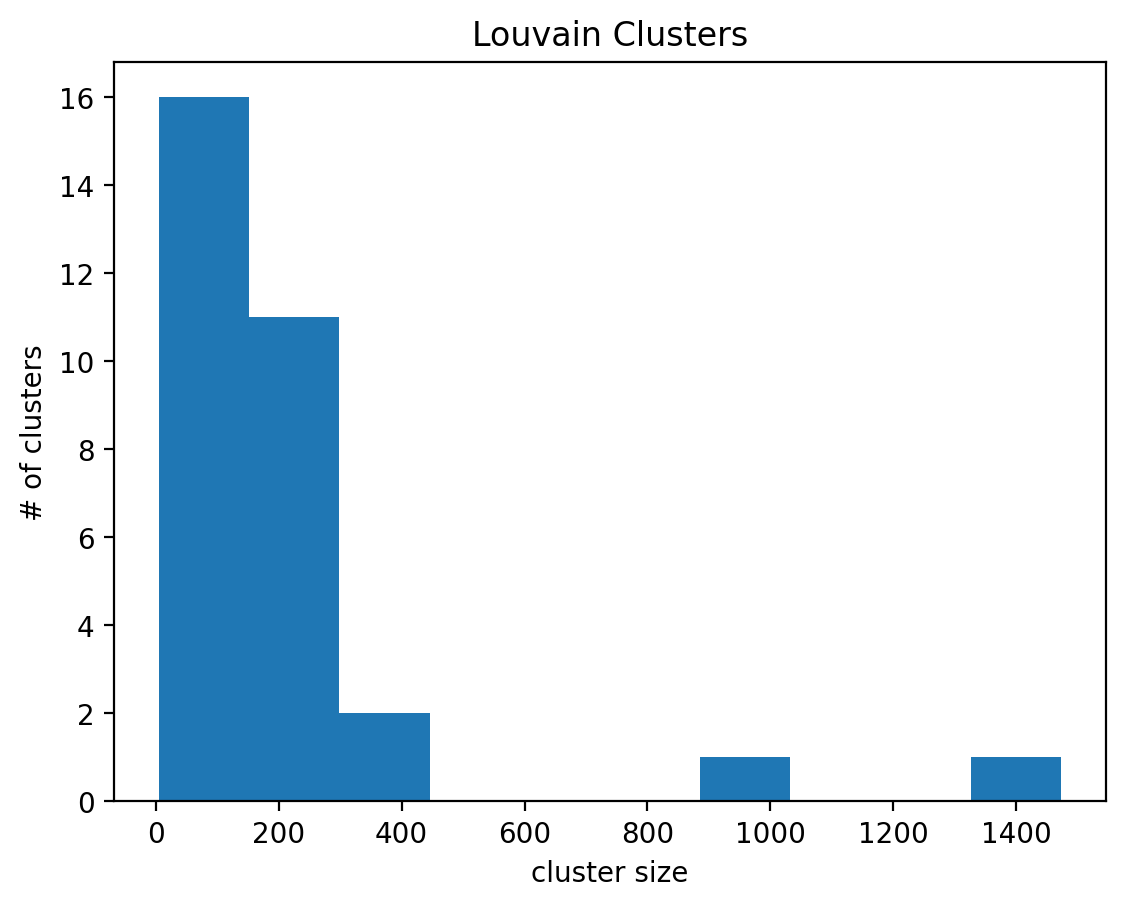

In [5]:
# analysis of louvain clusters.
cluster_analysis(true_label_communities,"Louvain Clusters")

k: 4
epsilon 4.3877747172430945
number of clusters: 21
largest: 620
smallest: 76
mean cluster size: 308.29
standard deviation: 156.79


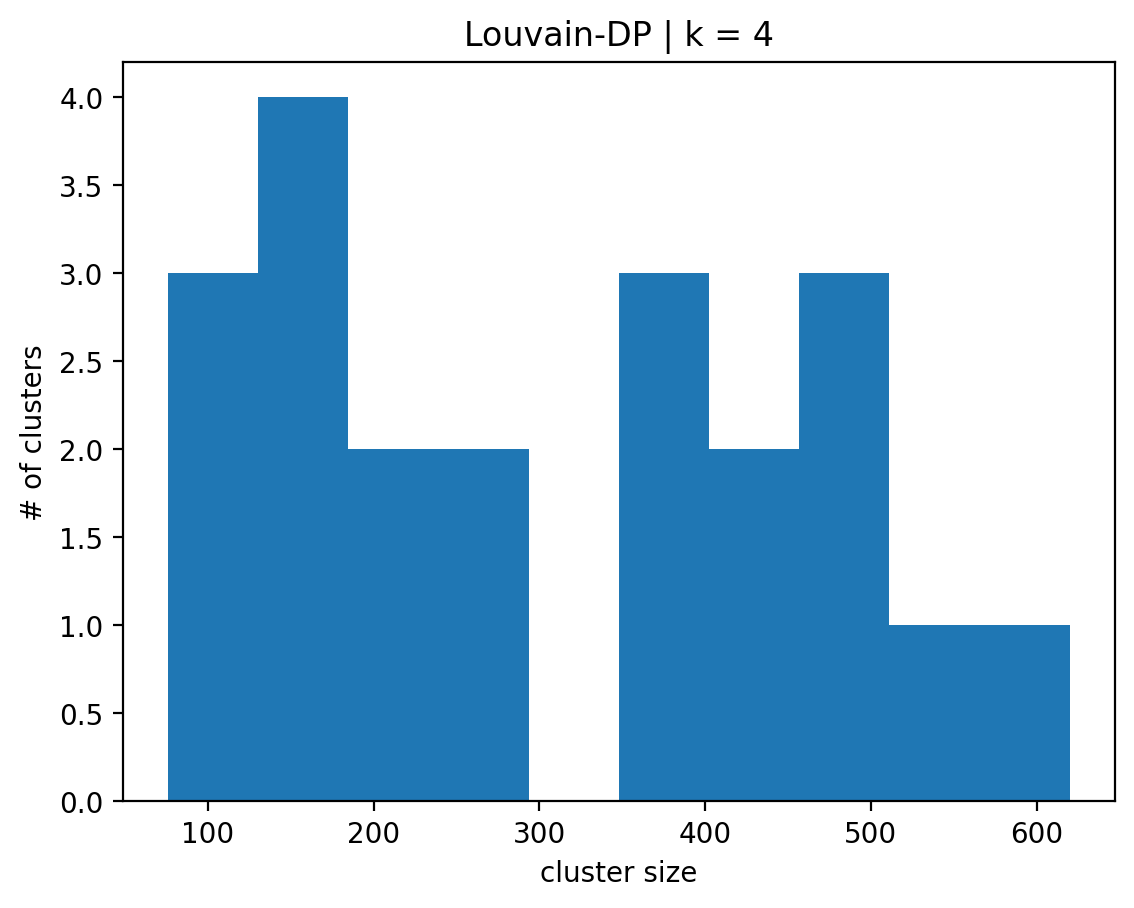

k: 8
epsilon 4.3877747172430945
number of clusters: 18
largest: 656
smallest: 168
mean cluster size: 359.67
standard deviation: 122.78


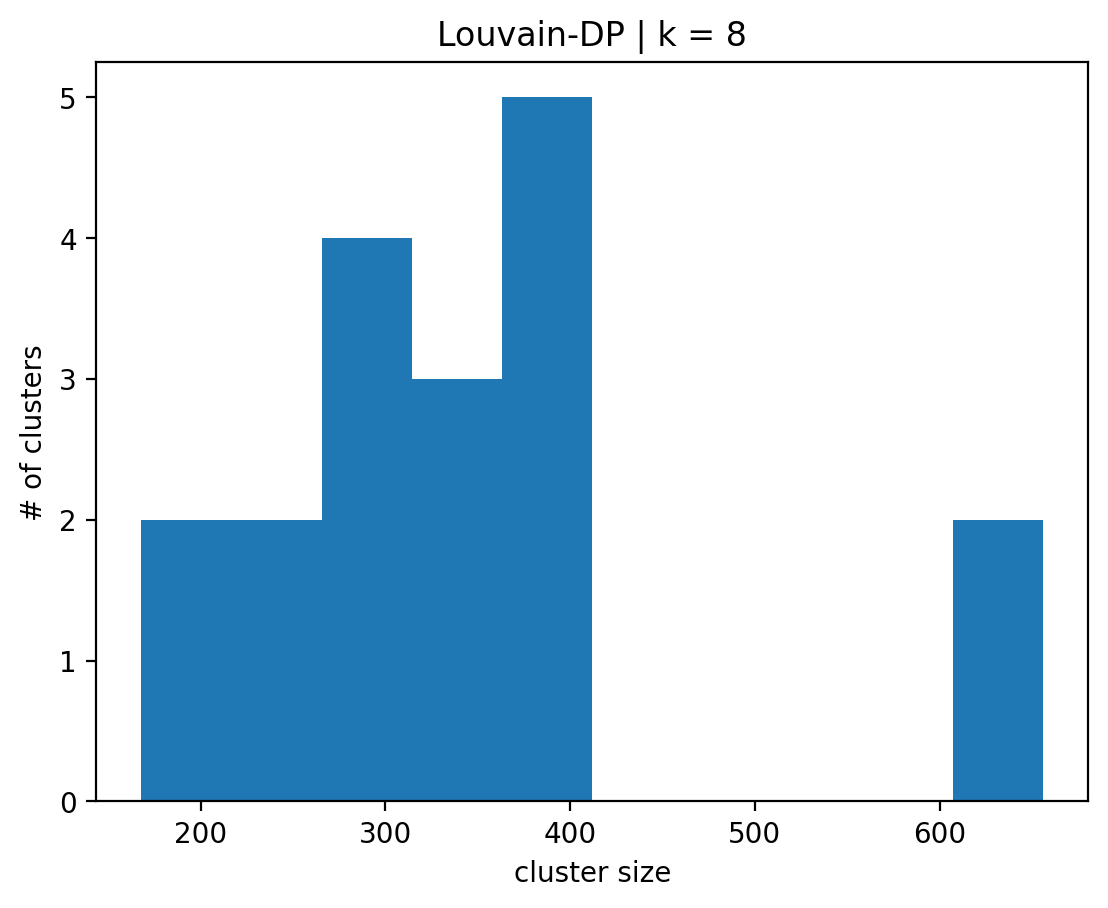

k: 16
epsilon 4.3877747172430945
number of clusters: 12
largest: 1184
smallest: 163
mean cluster size: 539.5
standard deviation: 278.61


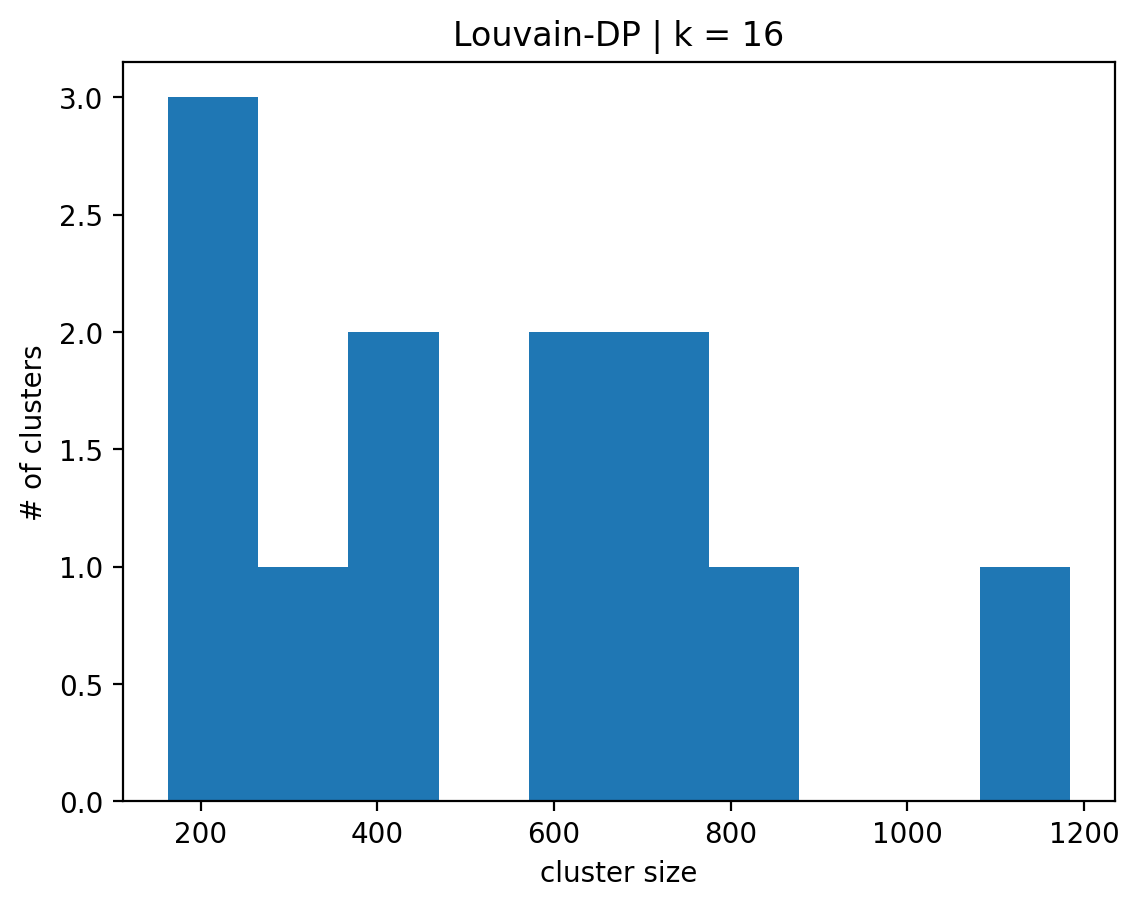

k: 32
epsilon 4.3877747172430945
number of clusters: 10
largest: 1024
smallest: 320
mean cluster size: 647.4
standard deviation: 231.97


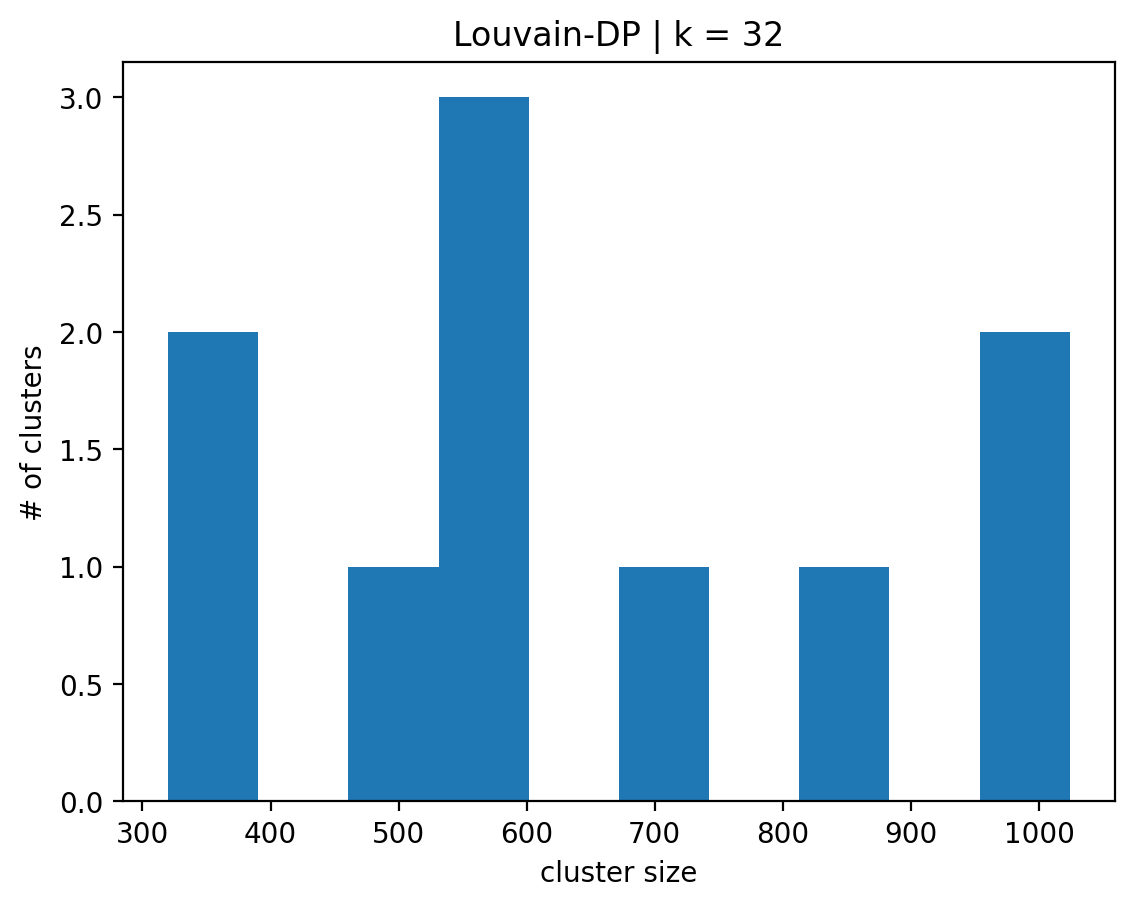

k: 64
epsilon 4.3877747172430945
number of clusters: 6
largest: 1792
smallest: 642
mean cluster size: 1079.0
standard deviation: 382.03


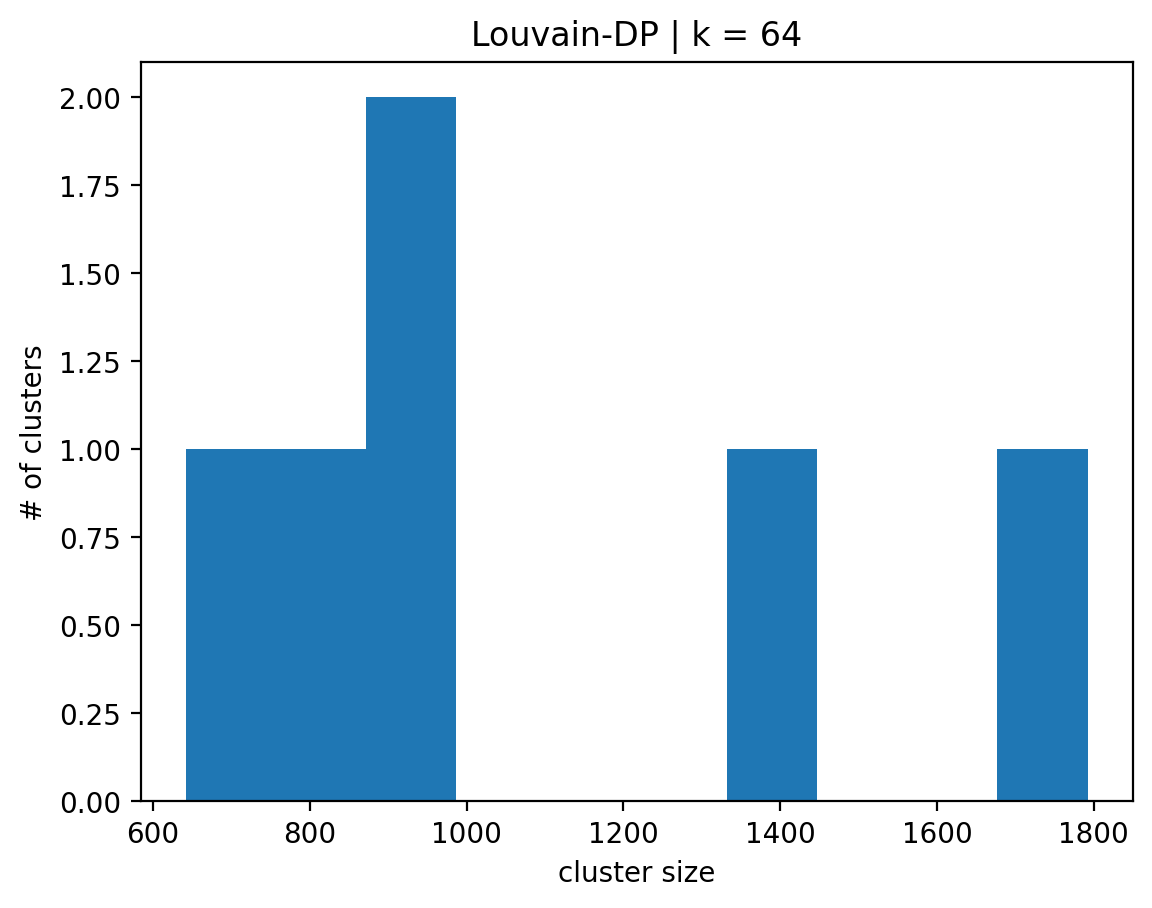

In [6]:
method = LouvainDP(G)
mod = []
for val in k:
    dp_communities, epsilon = method.louvain_dp(val)
    mod.append(modularity(G, dp_communities))
    cluster_analysis(dp_communities, f"Louvain-DP | k = {val}", val, epsilon)

In [7]:
# evaluation of louvain clusters.
print("Modularity of Louvain Communitites:",modularity(G, true_label_communities),"\n")
for i in range(len(mod)):
        print("Modularity of Louvain-DP communities:",mod[i],"\t| k:",k[i])

Modularity of Louvain Communitites: 0.6533135176549667 

Modularity of Louvain-DP communities: 0.22412383732877572 	| k: 4
Modularity of Louvain-DP communities: 0.15873683790718987 	| k: 8
Modularity of Louvain-DP communities: 0.12835550026214443 	| k: 16
Modularity of Louvain-DP communities: 0.10176530631667803 	| k: 32
Modularity of Louvain-DP communities: 0.0748887384836746 	| k: 64


### <i>Ca-astorPh Graph Dataset</i>

In [8]:
# amazon co-purchasing graph dataset
load_dotenv()
file_path = os.getenv('ca-astroph')

G = nx.read_edgelist(file_path, comments='#')

graph_info(G,"Ca-AstroPh graph dataset")

Ca-AstroPh graph dataset
------------------------------------
number of nodes: 18772
number of edges: 198110
directed graph: False
average degree: 21.0
number of connected components: 290
density: 0.0011244455715955115
average clusting: 0.6306


In [ ]:
#louvain method
true_label_communities = nx.community.louvain_communities(G,resolution=1, seed=123)

CPU times: total: 4.47 s
Wall time: 7.42 s


number of clusters: 324
largest: 2008
smallest: 1
mean cluster size: 57.94
standard deviation: 227.93


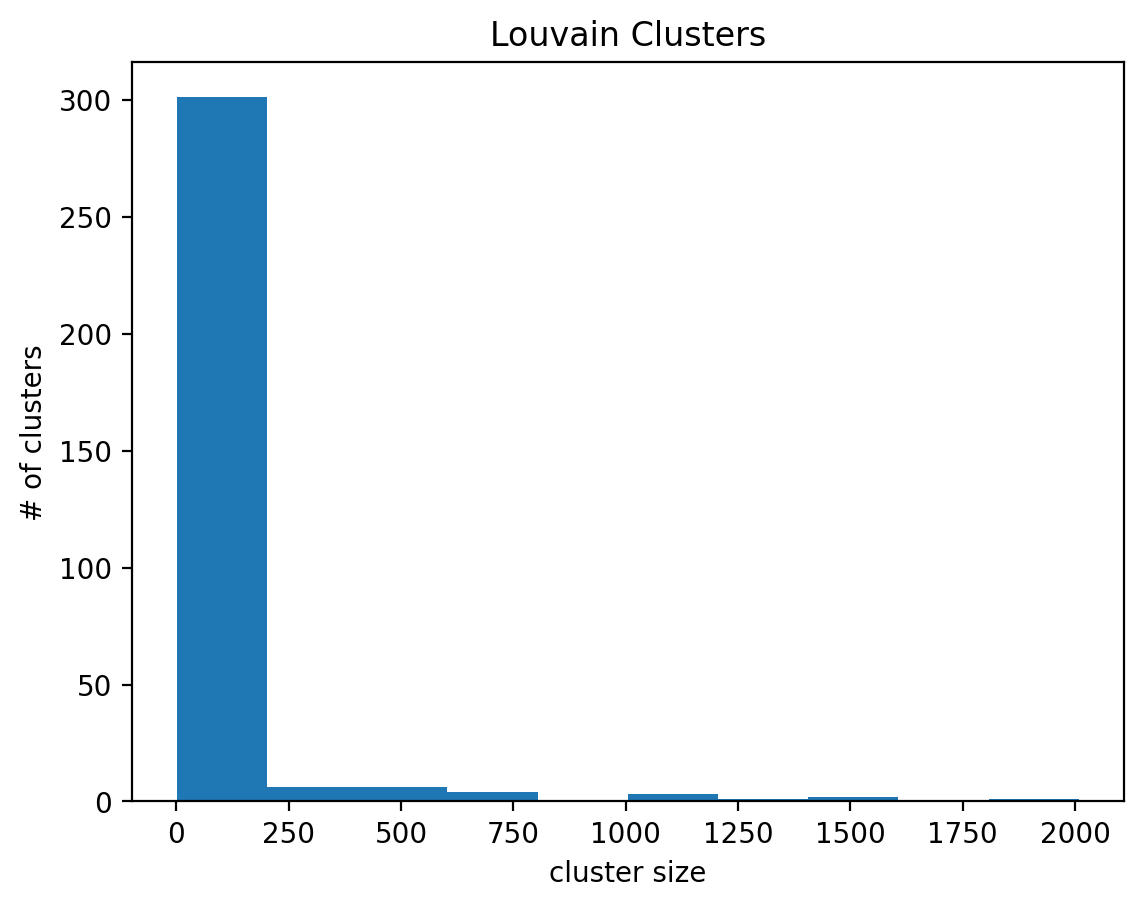

In [10]:
# analysis of louvain clusters.
cluster_analysis(true_label_communities,"Louvain Clusters")

k: 4
epsilon 4.920060838457154
number of clusters: 21
largest: 2416
smallest: 340
mean cluster size: 893.9
standard deviation: 471.09


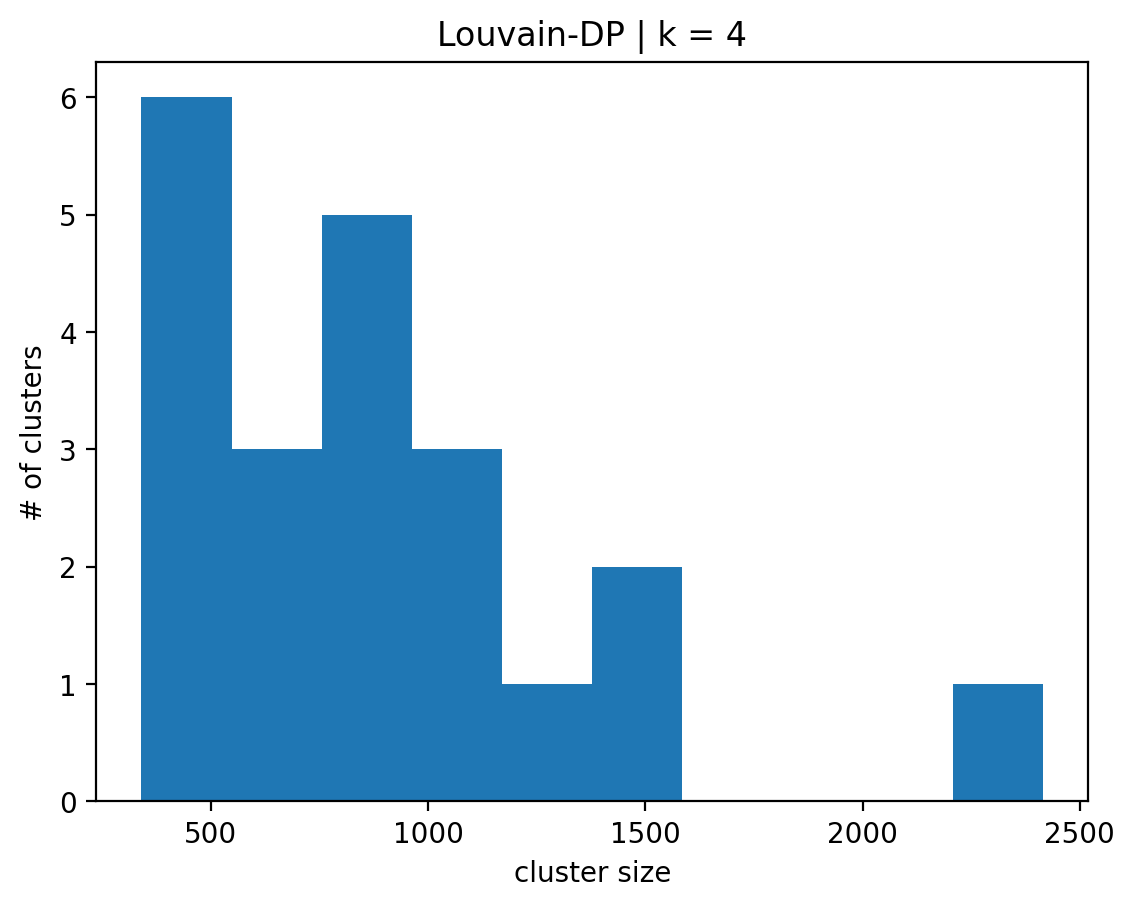

k: 8
epsilon 4.920060838457154
number of clusters: 12
largest: 2552
smallest: 609
mean cluster size: 1564.33
standard deviation: 464.29


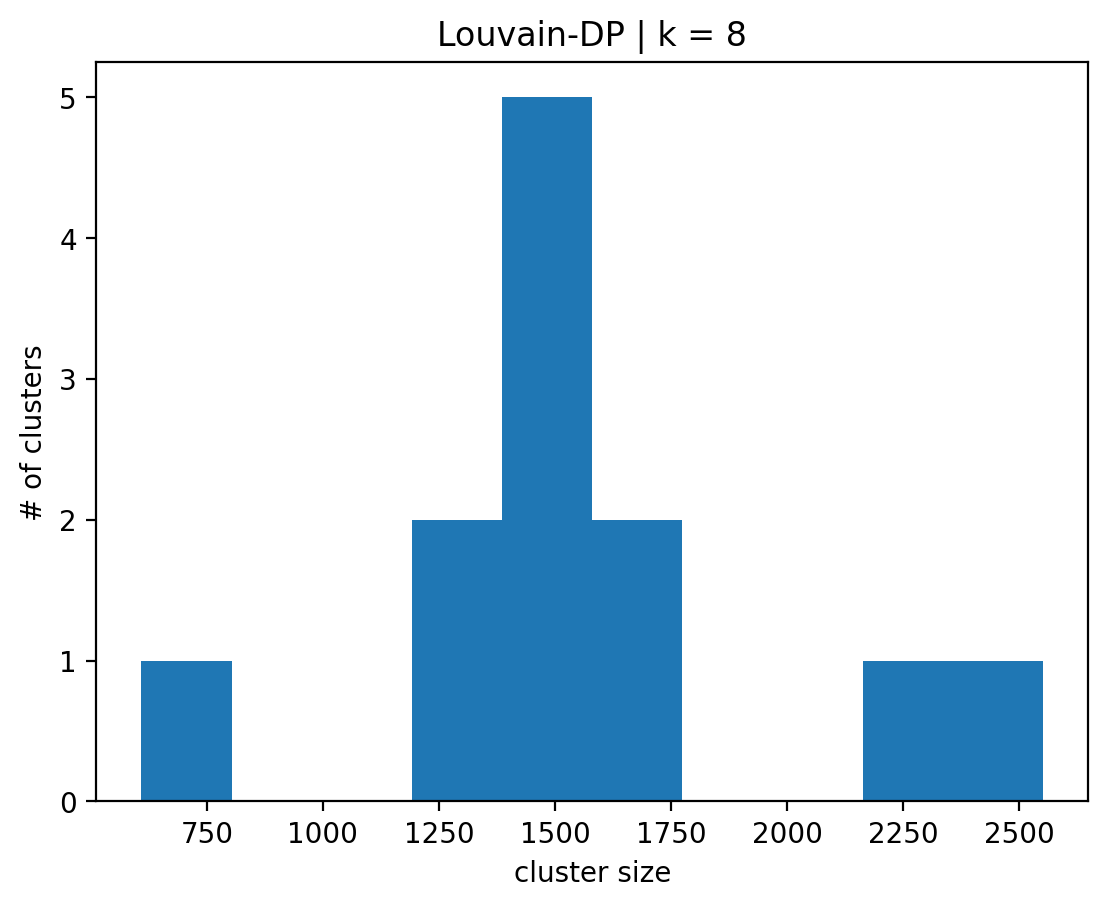

k: 16
epsilon 4.920060838457154
number of clusters: 11
largest: 3248
smallest: 929
mean cluster size: 1706.55
standard deviation: 613.46


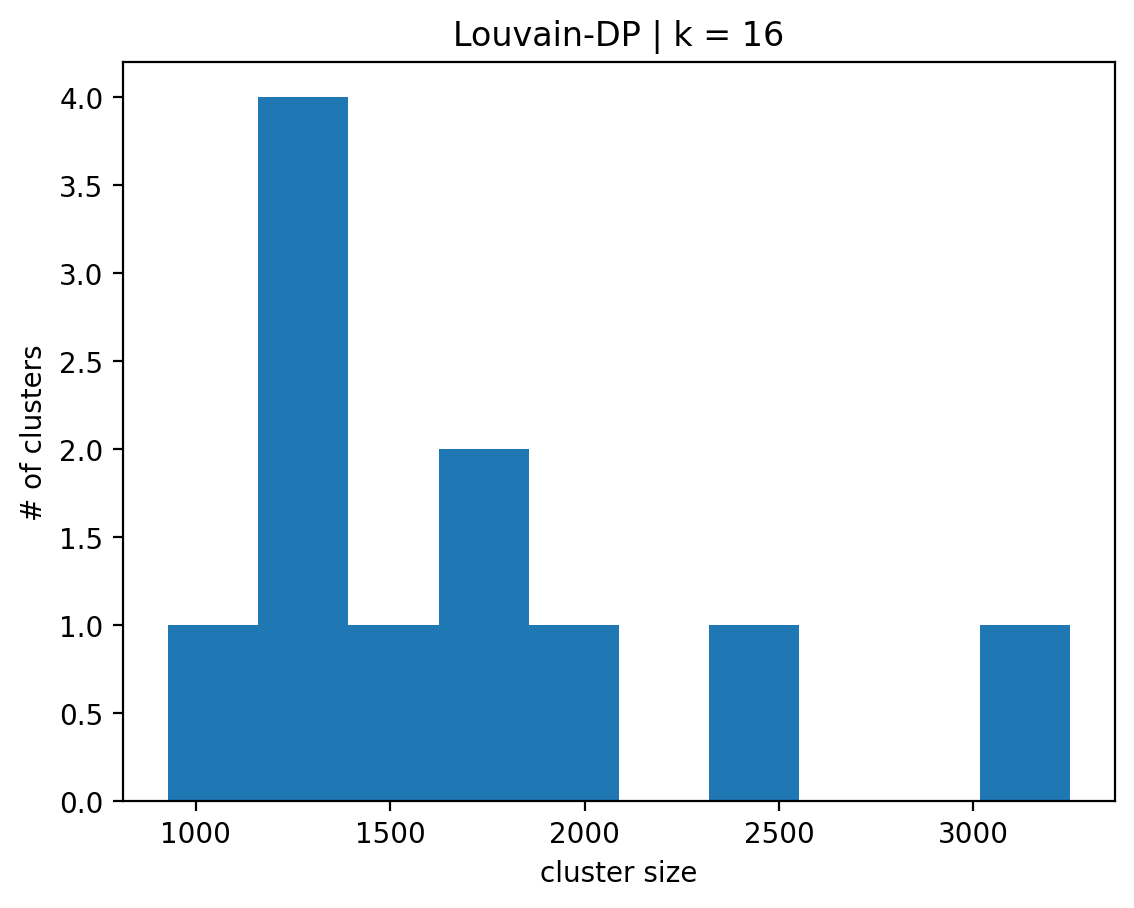

k: 32
epsilon 4.920060838457154
number of clusters: 8
largest: 3907
smallest: 931
mean cluster size: 2346.5
standard deviation: 923.57


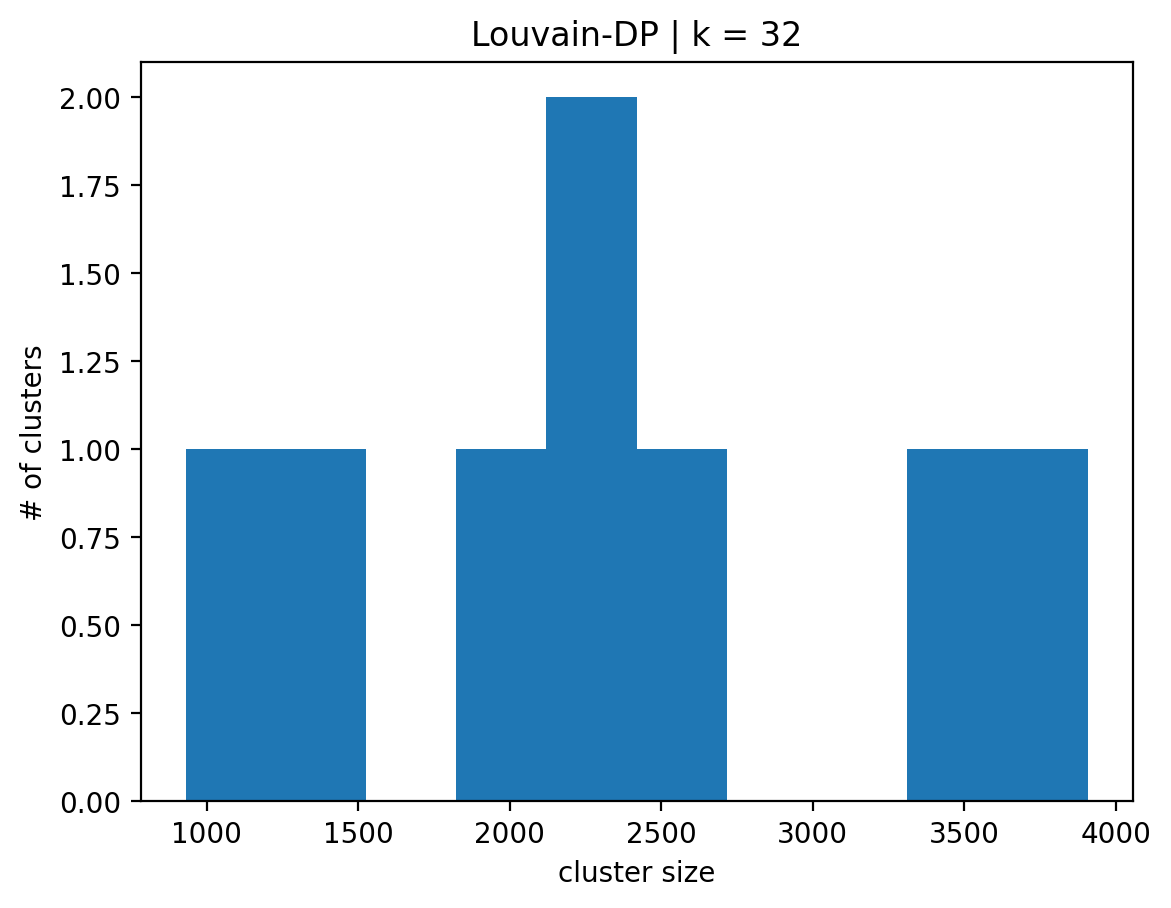

k: 64
epsilon 4.920060838457154
number of clusters: 7
largest: 3523
smallest: 1666
mean cluster size: 2681.71
standard deviation: 583.18


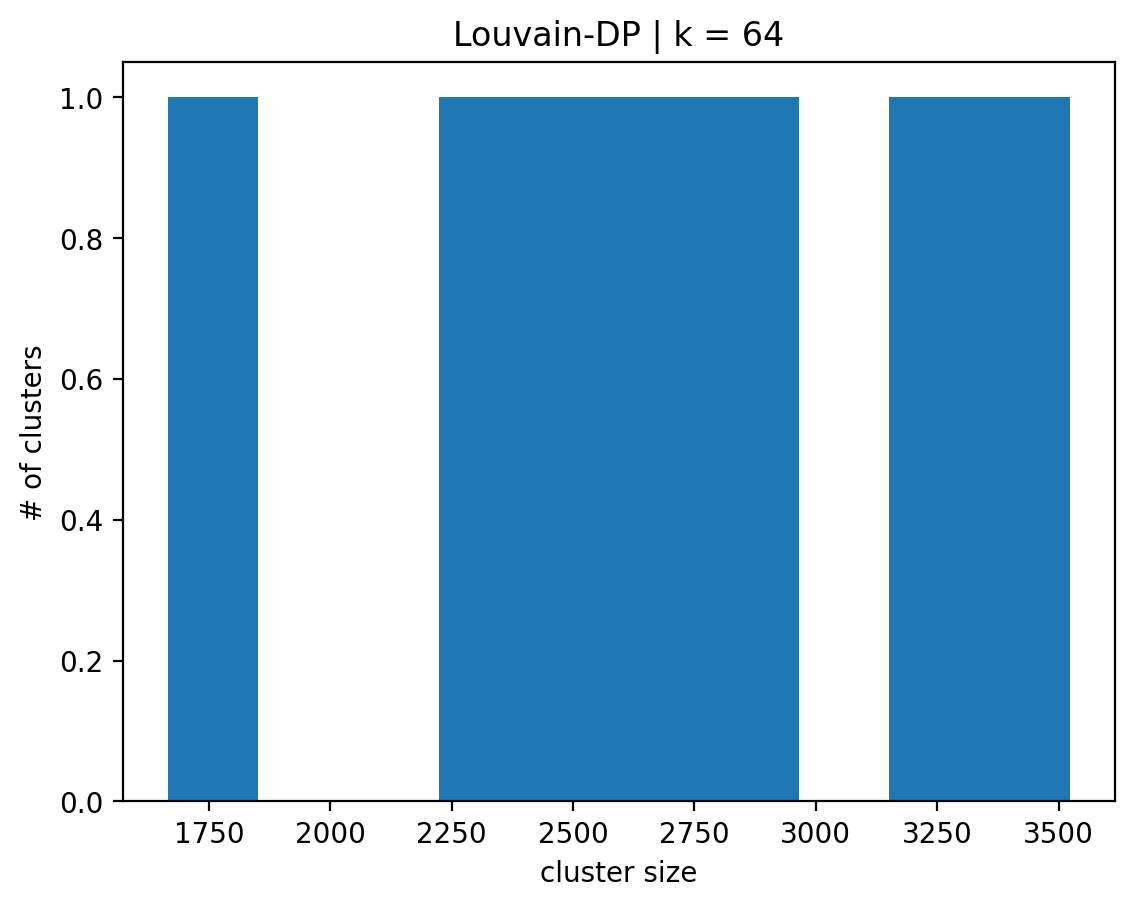

In [11]:
method = LouvainDP(G)
mod = []
for val in k:
    dp_communities, epsilon = method.louvain_dp(val)
    mod.append(modularity(G, dp_communities))
    cluster_analysis(dp_communities, f"Louvain-DP | k = {val}", val, epsilon)

In [12]:
# evaluation of louvain clusters.
print("Modularity of Louvain Communitites:",modularity(G, true_label_communities),"\n")
for i in range(len(mod)):
        print("Modularity of Louvain-DP communities:",mod[i],"\t| k:",k[i])

Modularity of Louvain Communitites: 0.6242853635779333 

Modularity of Louvain-DP communities: 0.2529932617156718 	| k: 4
Modularity of Louvain-DP communities: 0.14703923544101216 	| k: 8
Modularity of Louvain-DP communities: 0.07871614403633391 	| k: 16
Modularity of Louvain-DP communities: 0.014491715157585508 	| k: 32
Modularity of Louvain-DP communities: 0.0014057453760305347 	| k: 64


### <i>Amazon Co-purchasing Graph Dataset</i>

In [13]:
# amazon co-purchasing graph dataset
load_dotenv()
amazon_file_path = os.getenv('amazon')

G = nx.read_edgelist(amazon_file_path, comments='#')

graph_info(G,"Amazon co-purchasing graph dataset")

Amazon co-purchasing graph dataset
------------------------------------
number of nodes: 334863
number of edges: 925872
directed graph: False
average degree: 5.0
number of connected components: 1
density: 1.6513834036534368e-05
average clusting: 0.3967


In [ ]:
#louvain method
true_label_communities = nx.community.louvain_communities(G,resolution=1, seed=123)

CPU times: total: 32.8 s
Wall time: 1min 34s


number of clusters: 242
largest: 11938
smallest: 11
mean cluster size: 1383.73
standard deviation: 2155.57


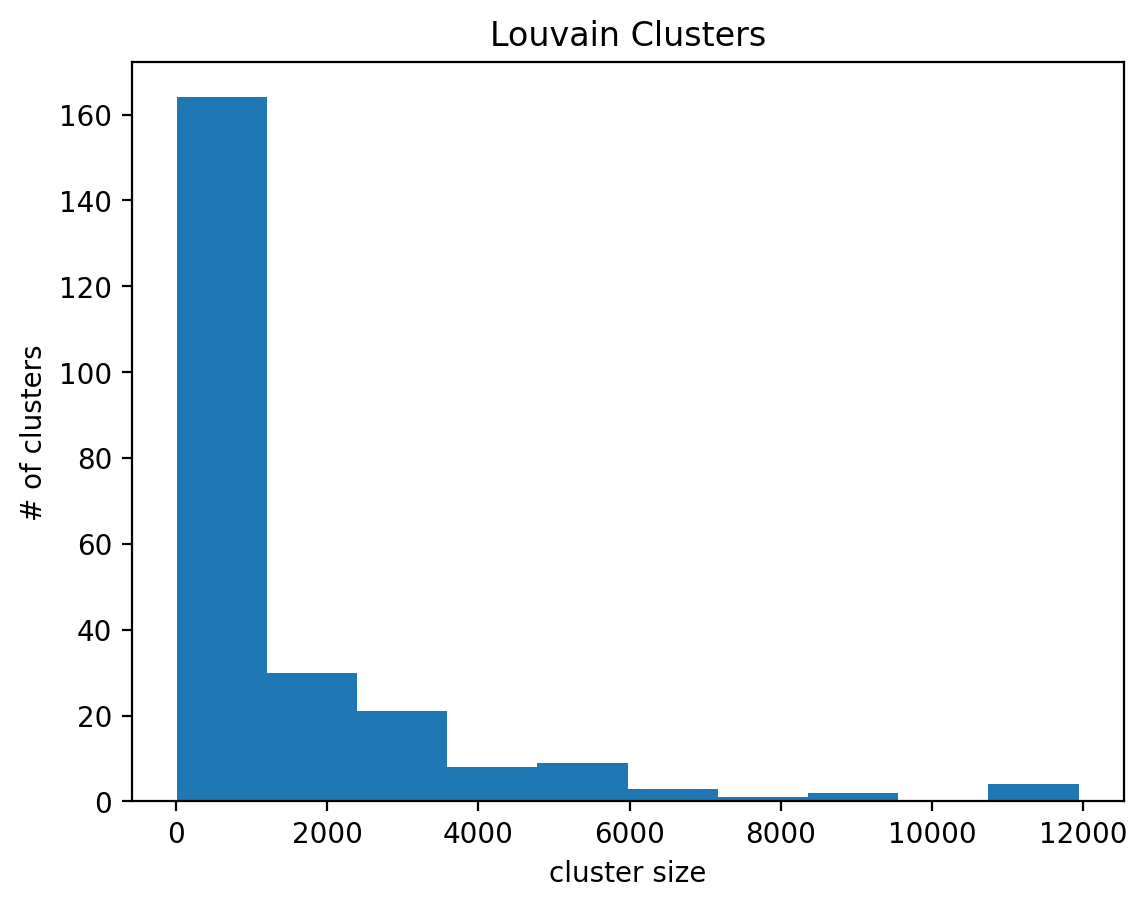

In [15]:
# analysis of louvain clusters.
cluster_analysis(true_label_communities,"Louvain Clusters")

k: 4
epsilon 6.360738385969165
number of clusters: 103
largest: 6872
smallest: 1032
mean cluster size: 3251.1
standard deviation: 1038.51


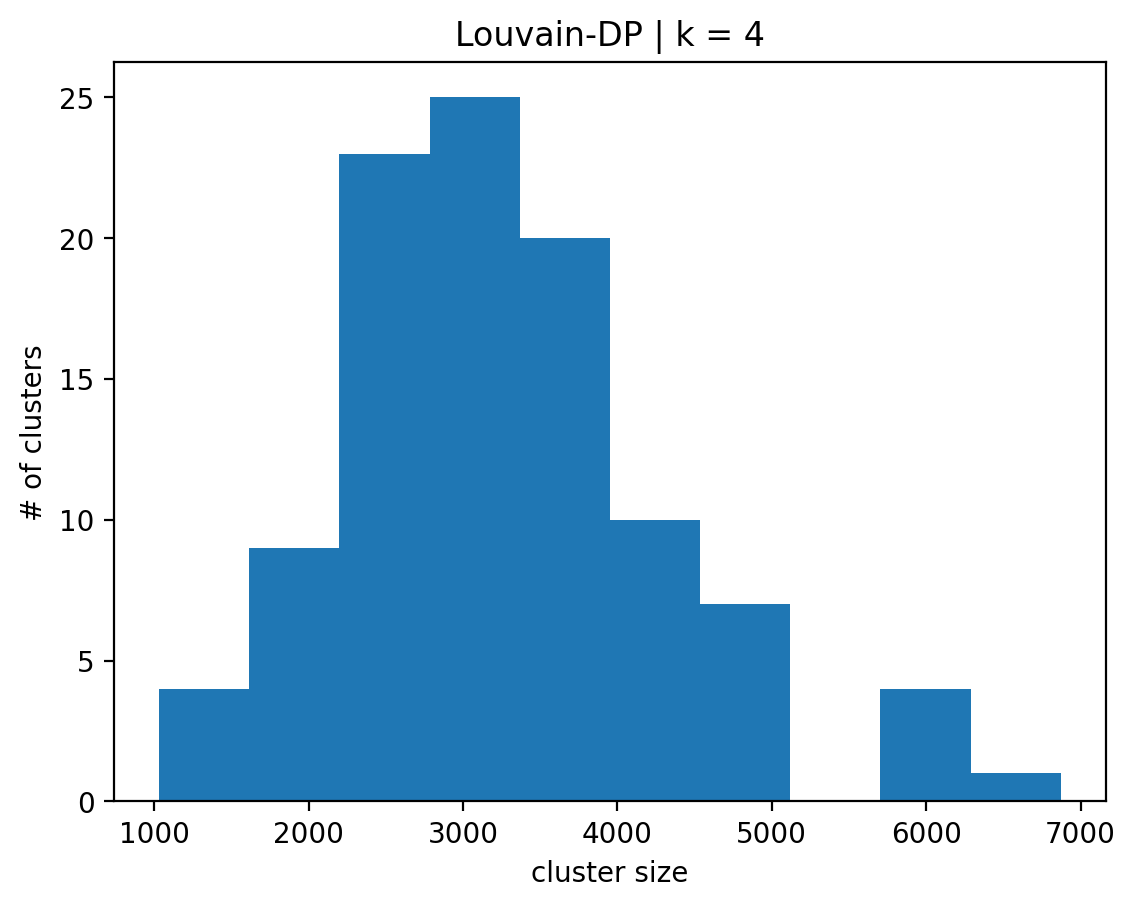

k: 8
epsilon 6.360738385969165
number of clusters: 52
largest: 19360
smallest: 2168
mean cluster size: 6439.67
standard deviation: 3800.12


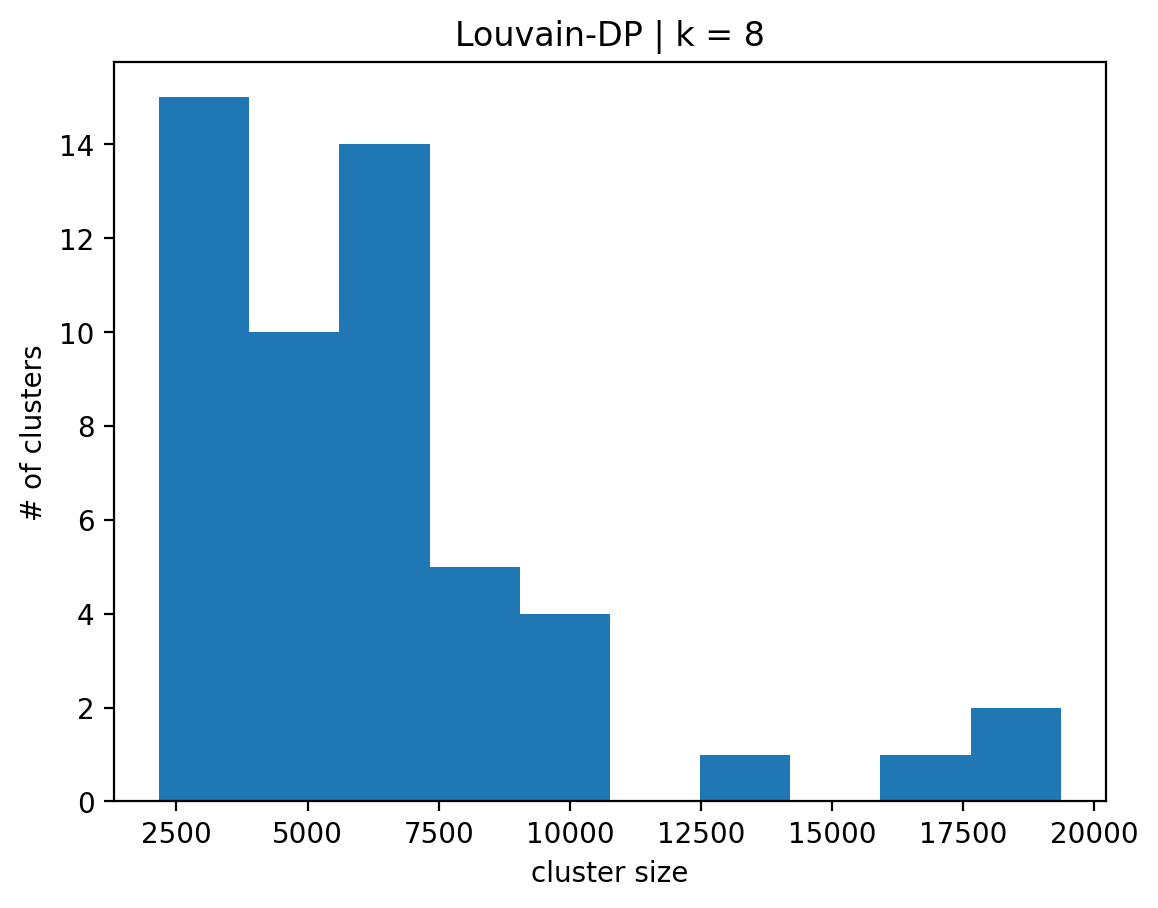

k: 16
epsilon 6.360738385969165
number of clusters: 24
largest: 29729
smallest: 1920
mean cluster size: 13952.62
standard deviation: 7693.18


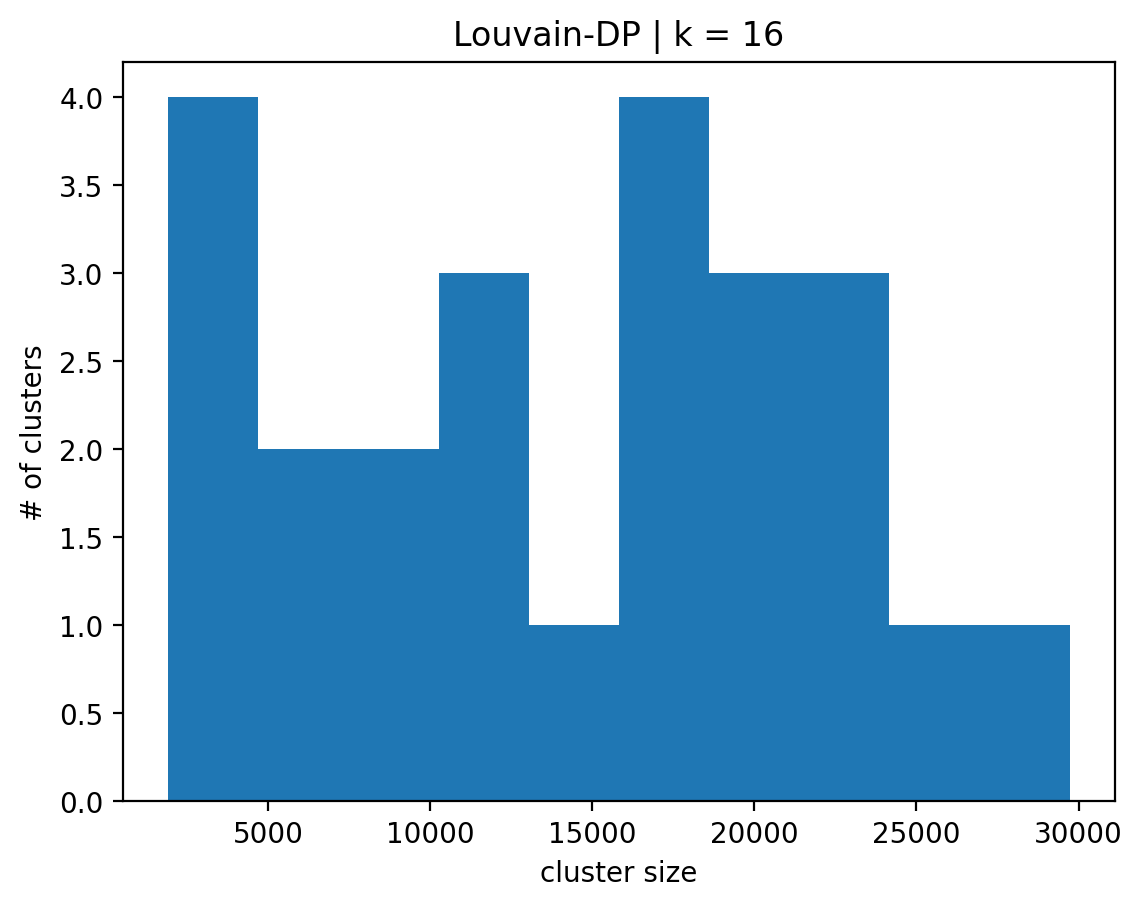

k: 32
epsilon 6.360738385969165
number of clusters: 10
largest: 83586
smallest: 10624
mean cluster size: 33486.3
standard deviation: 26027.71


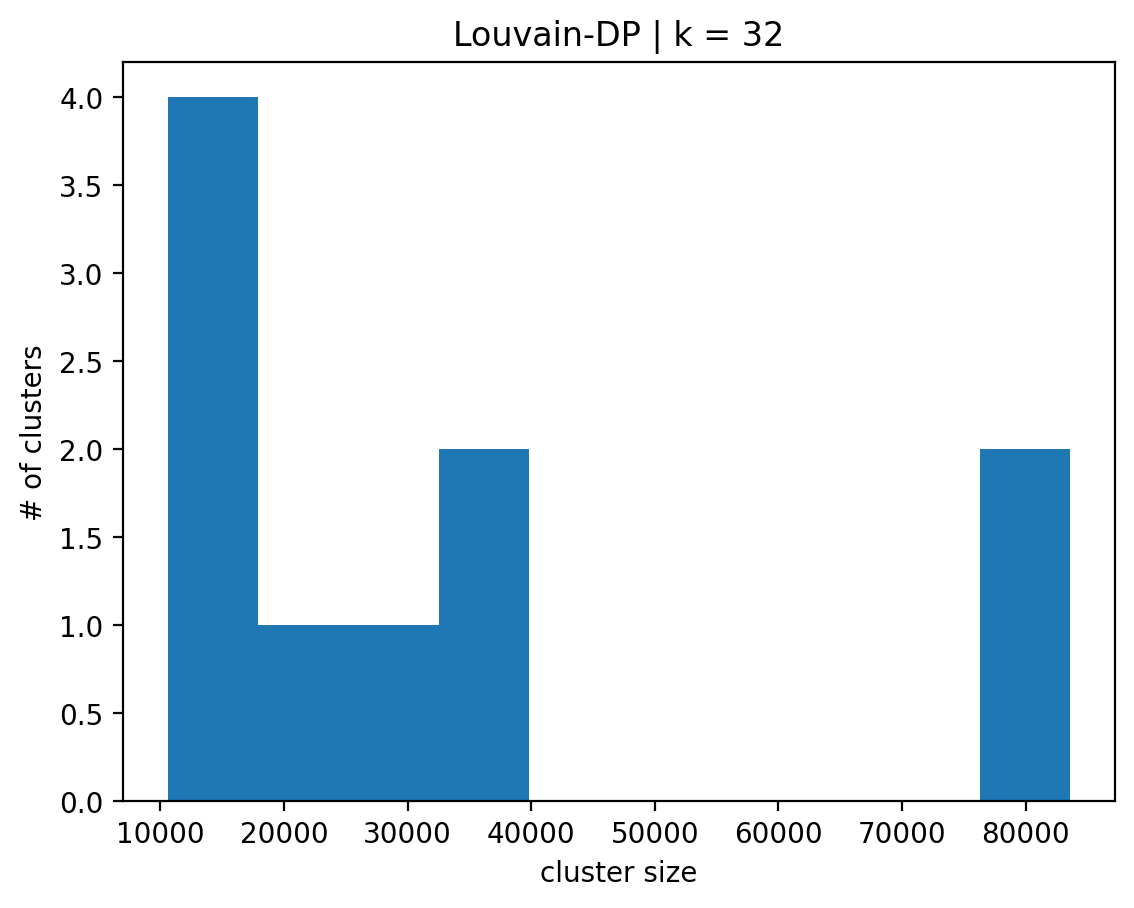

k: 64
epsilon 6.360738385969165
number of clusters: 11
largest: 49154
smallest: 10881
mean cluster size: 30442.09
standard deviation: 12374.62


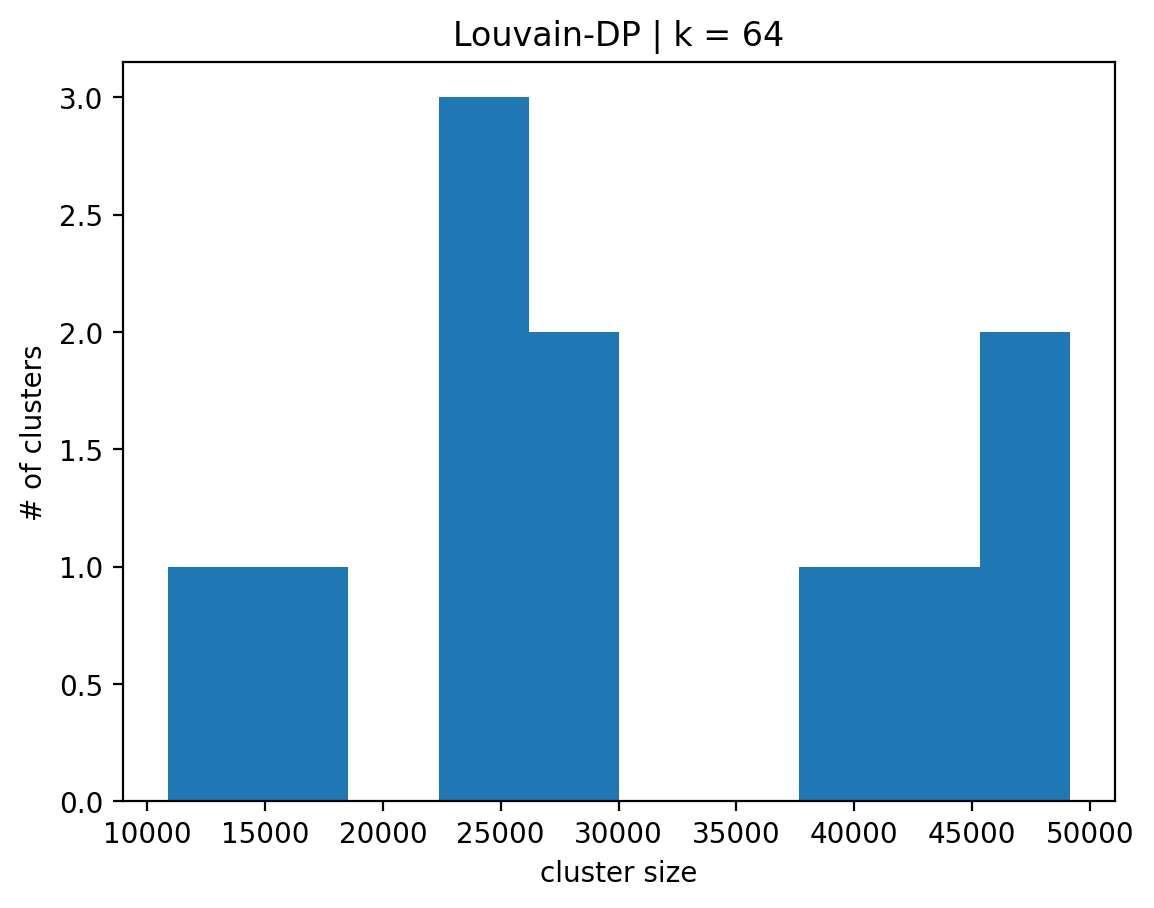

In [16]:
method = LouvainDP(G)
mod = []
for val in k:
    dp_communities, epsilon = method.louvain_dp(val)
    mod.append(modularity(G, dp_communities))
    cluster_analysis(dp_communities, f"Louvain-DP | k = {val}", val, epsilon)

In [17]:
# evaluation of louvain clusters.
print("Modularity of Louvain Communitites:",modularity(G, true_label_communities),"\n")
for i in range(len(mod)):
        print("Modularity of Louvain-DP communities:",mod[i],"\t| k:",k[i])

Modularity of Louvain Communitites: 0.9263909627459835 

Modularity of Louvain-DP communities: 0.17427326325389955 	| k: 4
Modularity of Louvain-DP communities: 0.08225649903197761 	| k: 8
Modularity of Louvain-DP communities: 0.04849975890547029 	| k: 16
Modularity of Louvain-DP communities: 0.04012628846639391 	| k: 32
Modularity of Louvain-DP communities: 0.030775806784005814 	| k: 64


### <i>Dblp Graph Dataset</i>

In [18]:
# amazon co-purchasing graph dataset
load_dotenv()
amazon_file_path = os.getenv('dblp')

G = nx.read_edgelist(file_path, comments='#')

graph_info(G,"Dblp graph dataset")

Dblp graph dataset
------------------------------------
number of nodes: 18772
number of edges: 198110
directed graph: False
average degree: 21.0
number of connected components: 290
density: 0.0011244455715955115
average clusting: 0.6306


In [19]:
#louvain method
true_label_communities = nx.community.louvain_communities(G,resolution=1, seed=123)

number of clusters: 324
largest: 2008
smallest: 1
mean cluster size: 57.94
standard deviation: 227.93


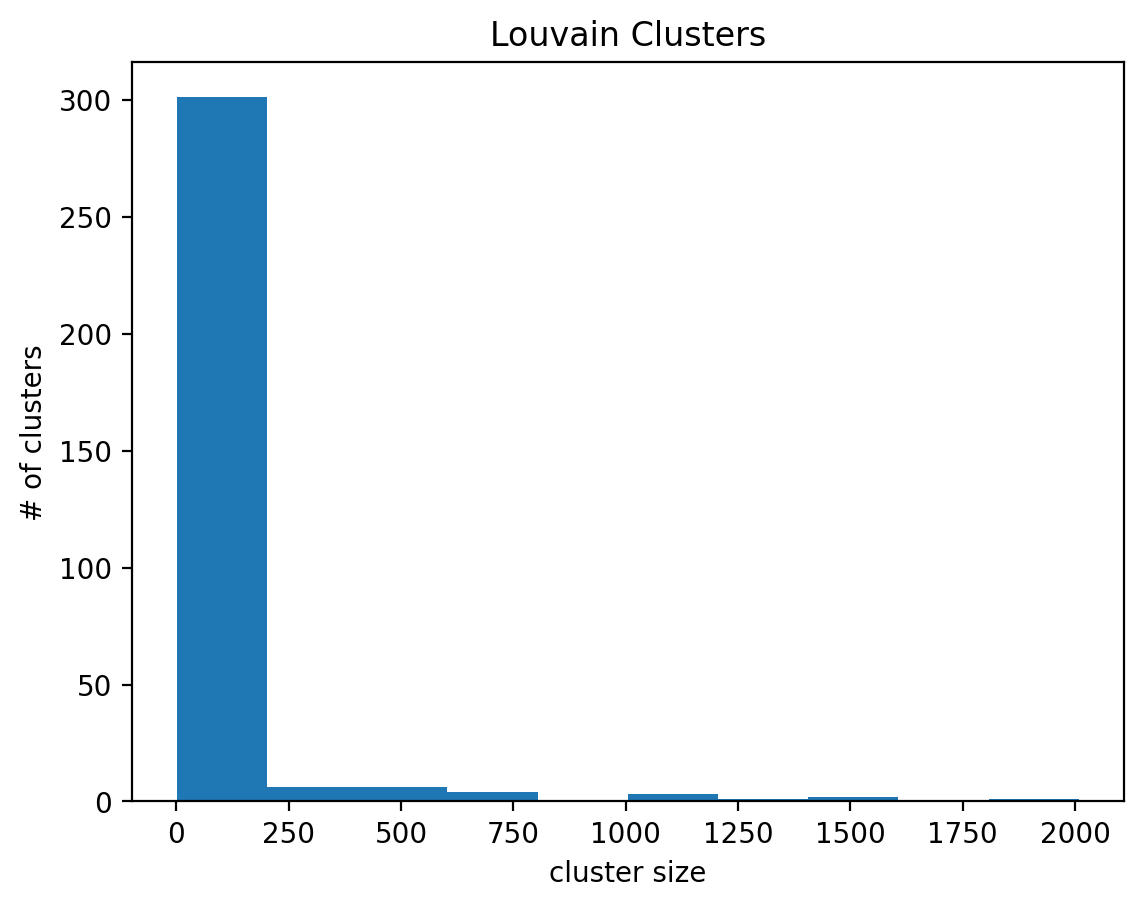

In [20]:
# analysis of louvain clusters.
cluster_analysis(true_label_communities,"Louvain Clusters")

k: 4
epsilon 4.920060838457154
number of clusters: 20
largest: 2188
smallest: 212
mean cluster size: 938.6
standard deviation: 544.03


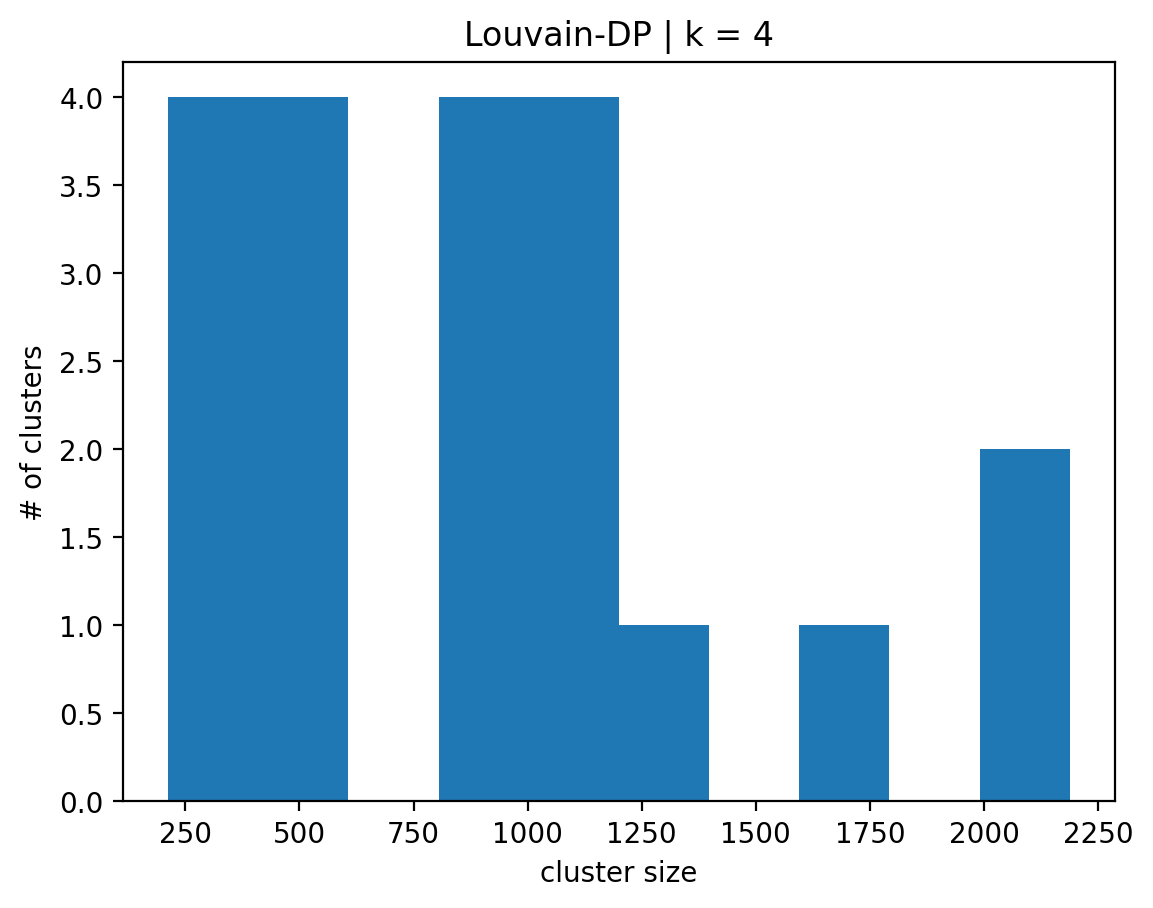

k: 8
epsilon 4.920060838457154
number of clusters: 14
largest: 2185
smallest: 584
mean cluster size: 1340.86
standard deviation: 456.85


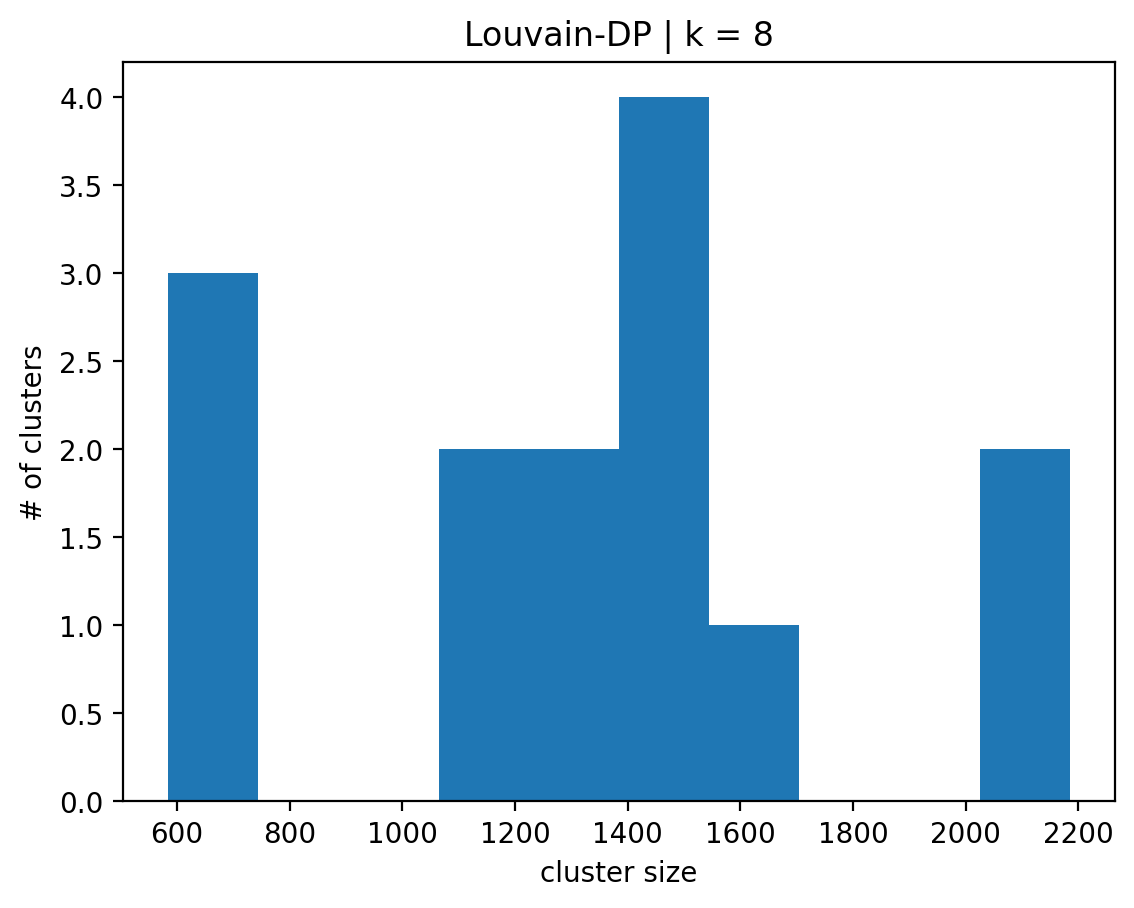

k: 16
epsilon 4.920060838457154
number of clusters: 7
largest: 3936
smallest: 1872
mean cluster size: 2681.71
standard deviation: 689.0


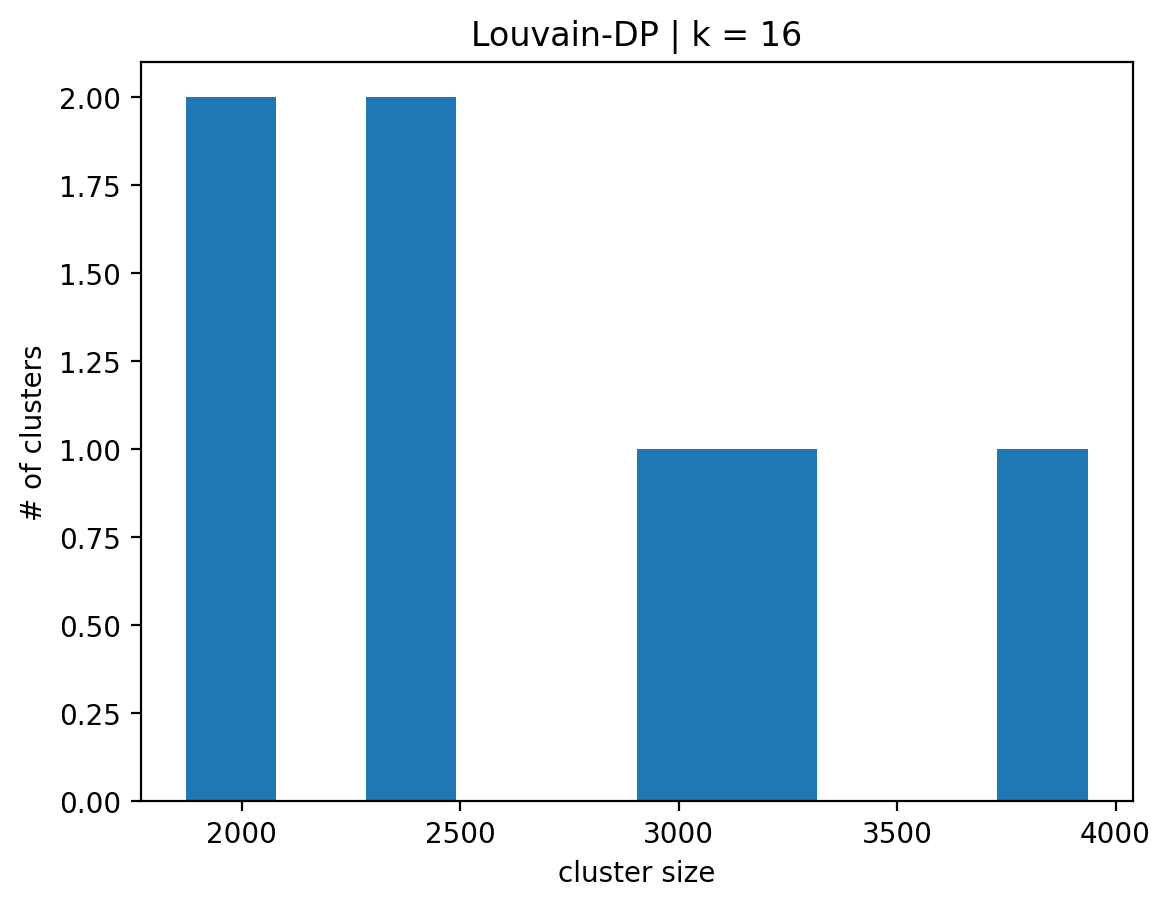

k: 32
epsilon 4.920060838457154
number of clusters: 9
largest: 2980
smallest: 899
mean cluster size: 2085.78
standard deviation: 666.89


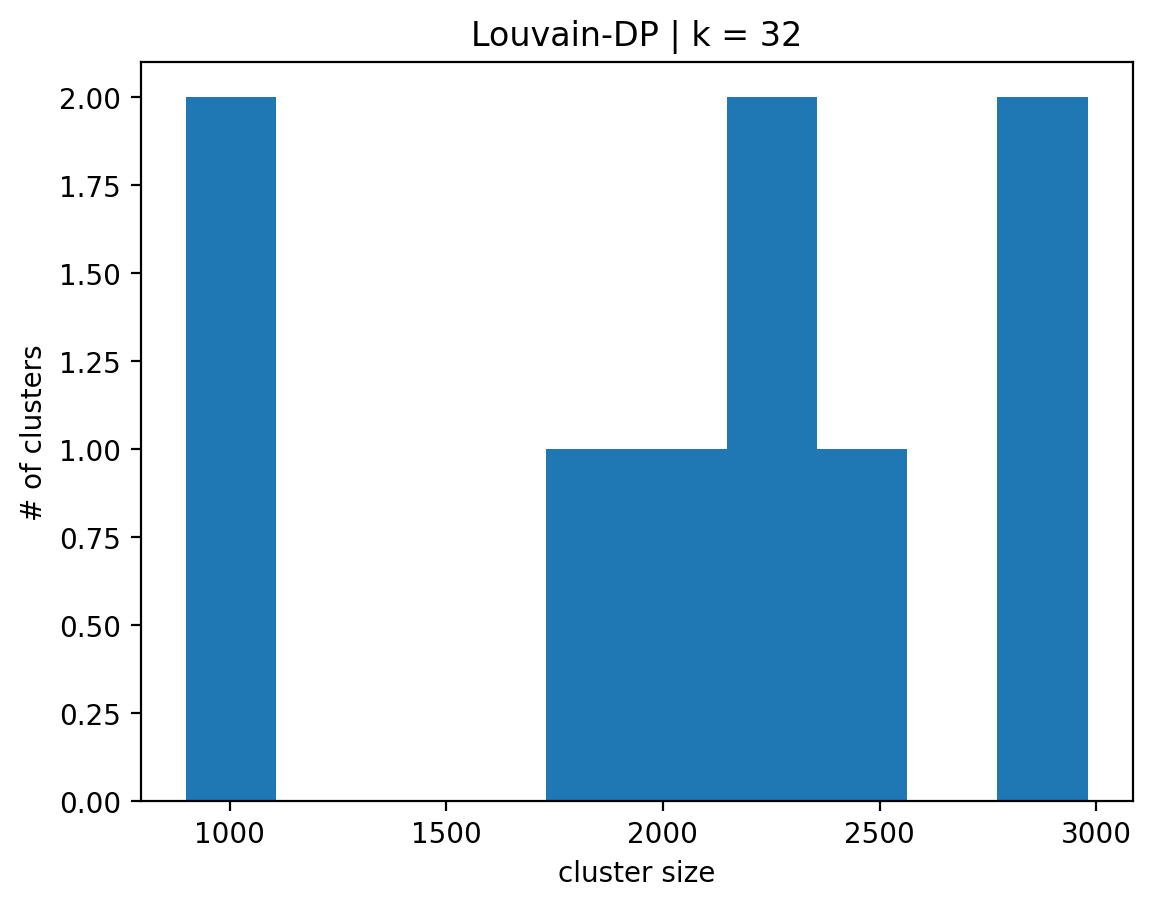

k: 64
epsilon 4.920060838457154
number of clusters: 8
largest: 3329
smallest: 1090
mean cluster size: 2346.5
standard deviation: 651.27


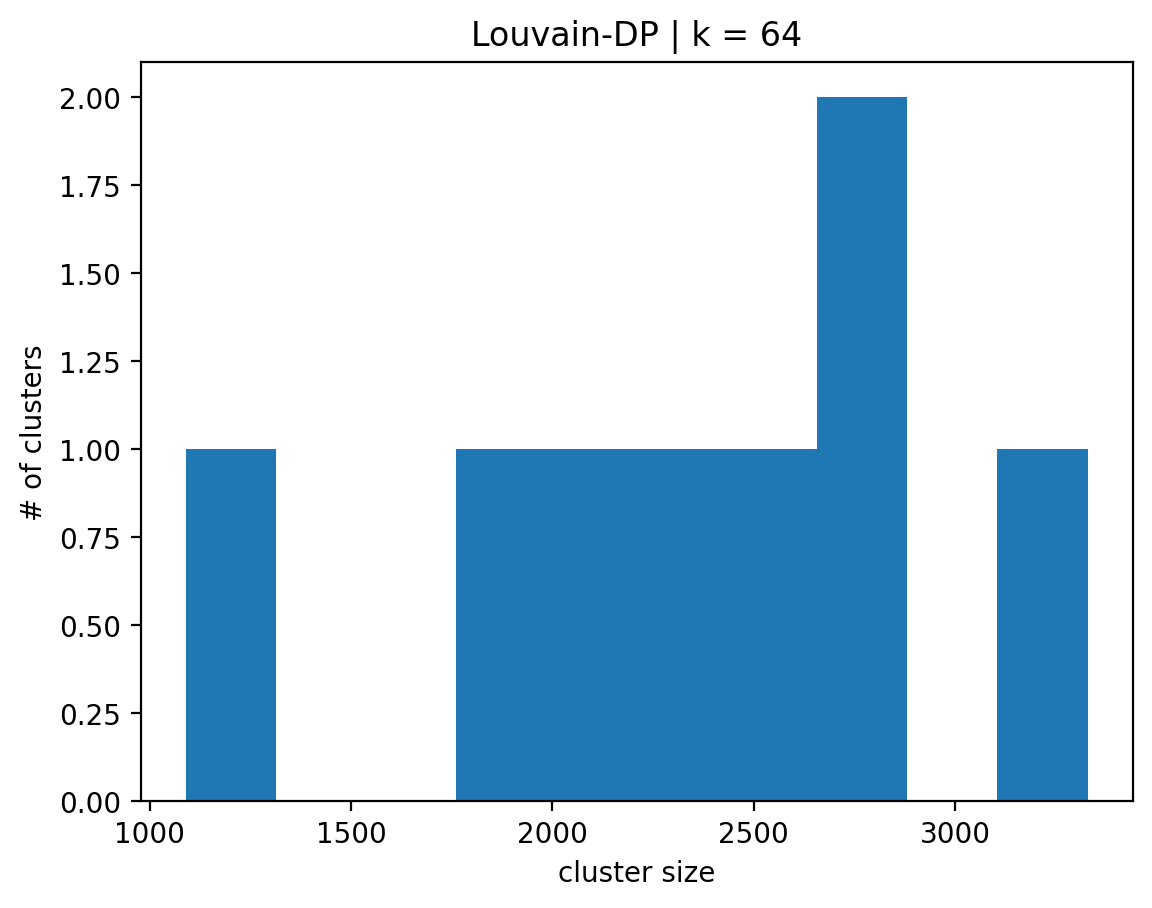

In [21]:
method = LouvainDP(G)
mod = []
for val in k:
    dp_communities, epsilon = method.louvain_dp(val)
    mod.append(modularity(G, dp_communities))
    cluster_analysis(dp_communities, f"Louvain-DP | k = {val}", val, epsilon)

In [22]:
# evaluation of louvain clusters.
print("Modularity of Louvain Communitites:",modularity(G, true_label_communities),"\n")
for i in range(len(mod)):
        print("Modularity of Louvain-DP communities:",mod[i],"\t| k:",k[i])

Modularity of Louvain Communitites: 0.6242853635779333 

Modularity of Louvain-DP communities: 0.2516495407368141 	| k: 4
Modularity of Louvain-DP communities: 0.15190389579537839 	| k: 8
Modularity of Louvain-DP communities: 0.07766668016389222 	| k: 16
Modularity of Louvain-DP communities: 0.00969039092484399 	| k: 32
Modularity of Louvain-DP communities: 0.0012935735201821531 	| k: 64


### <i>Youtube Graph Dataset</i>

In [23]:
# amazon co-purchasing graph dataset
load_dotenv()
file_path = os.getenv('youtube')

G = nx.read_edgelist(file_path, comments='#')

graph_info(G,"Youtube graph dataset")

Youtube graph dataset
------------------------------------
number of nodes: 1134890
number of edges: 2987624
directed graph: False
average degree: 5.0
number of connected components: 1
density: 4.639260713241579e-06
average clusting: 0.0808


In [24]:
#louvain method
true_label_communities = nx.community.louvain_communities(G,resolution=1, seed=123)

number of clusters: 5553
largest: 186225
smallest: 3
mean cluster size: 204.37
standard deviation: 3920.83


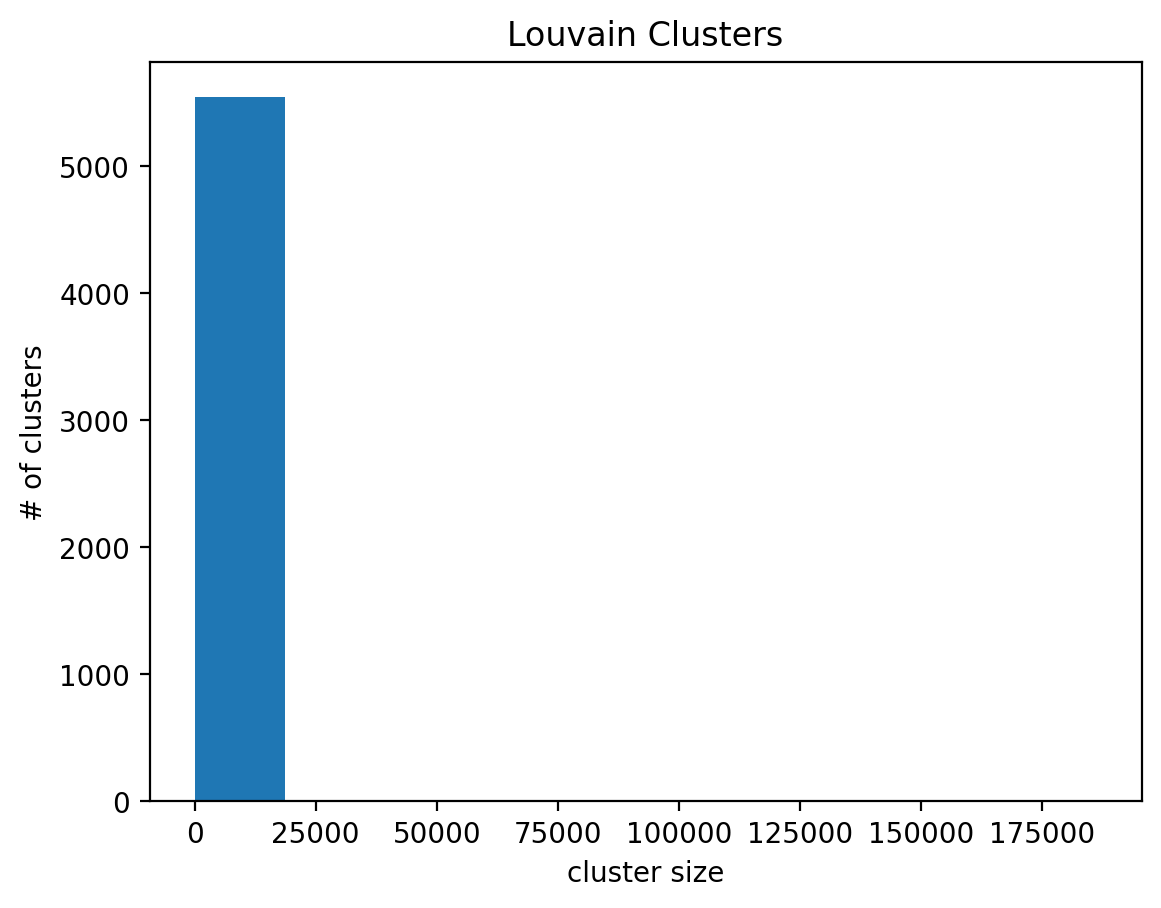

In [25]:
# analysis of louvain clusters.
cluster_analysis(true_label_communities,"Louvain Clusters")

k: 4
epsilon 6.971023143950696
number of clusters: 46
largest: 169552
smallest: 8
mean cluster size: 24671.52
standard deviation: 38960.46


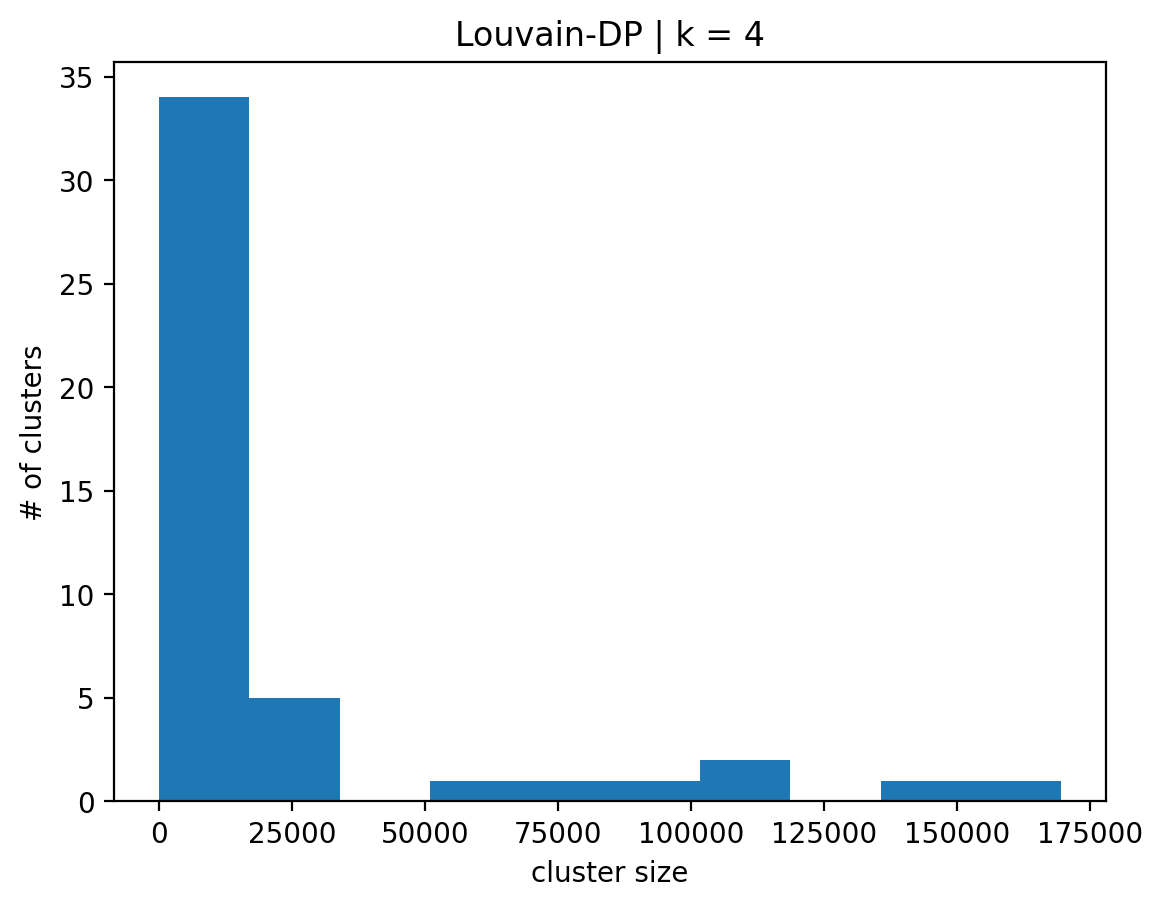

k: 8
epsilon 6.971023143950696
number of clusters: 21
largest: 213776
smallest: 64
mean cluster size: 54042.38
standard deviation: 60287.93


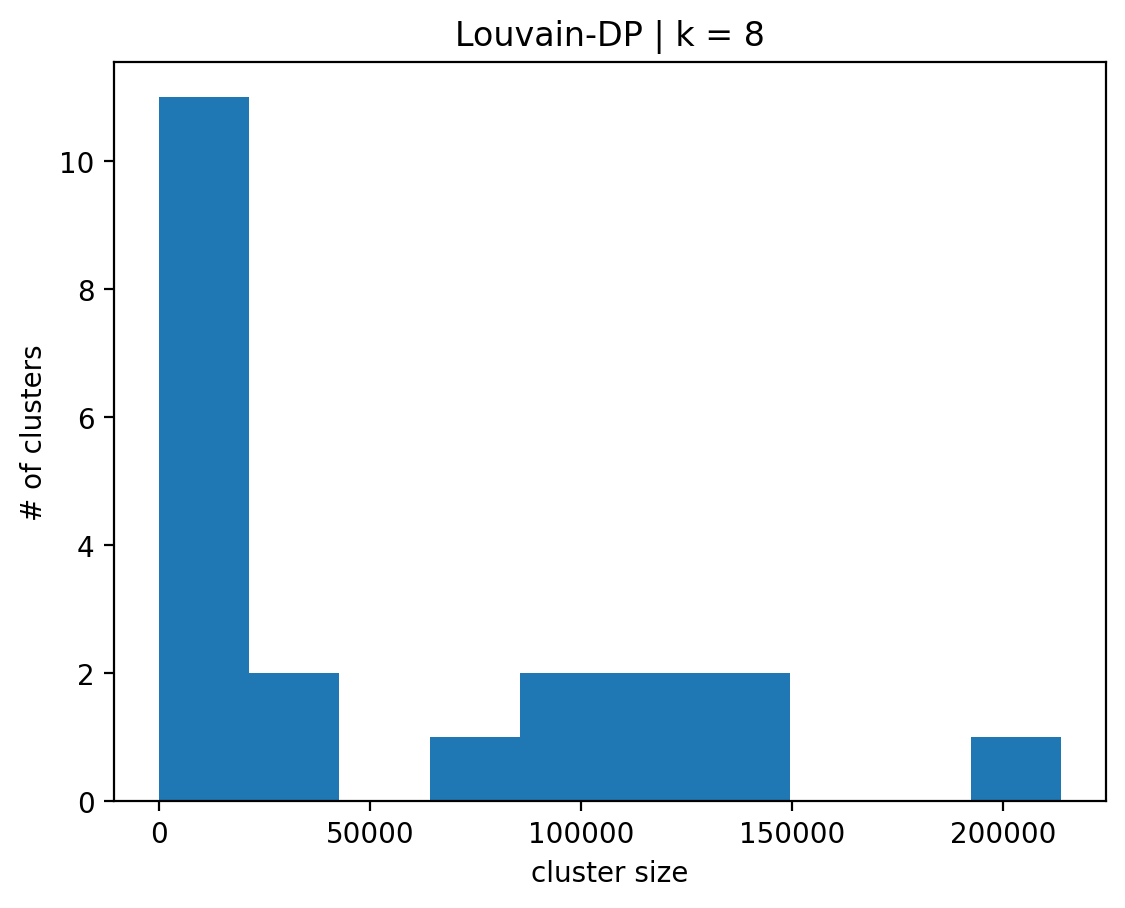

k: 16
epsilon 6.971023143950696
number of clusters: 12
largest: 248385
smallest: 1521
mean cluster size: 94574.17
standard deviation: 84036.41


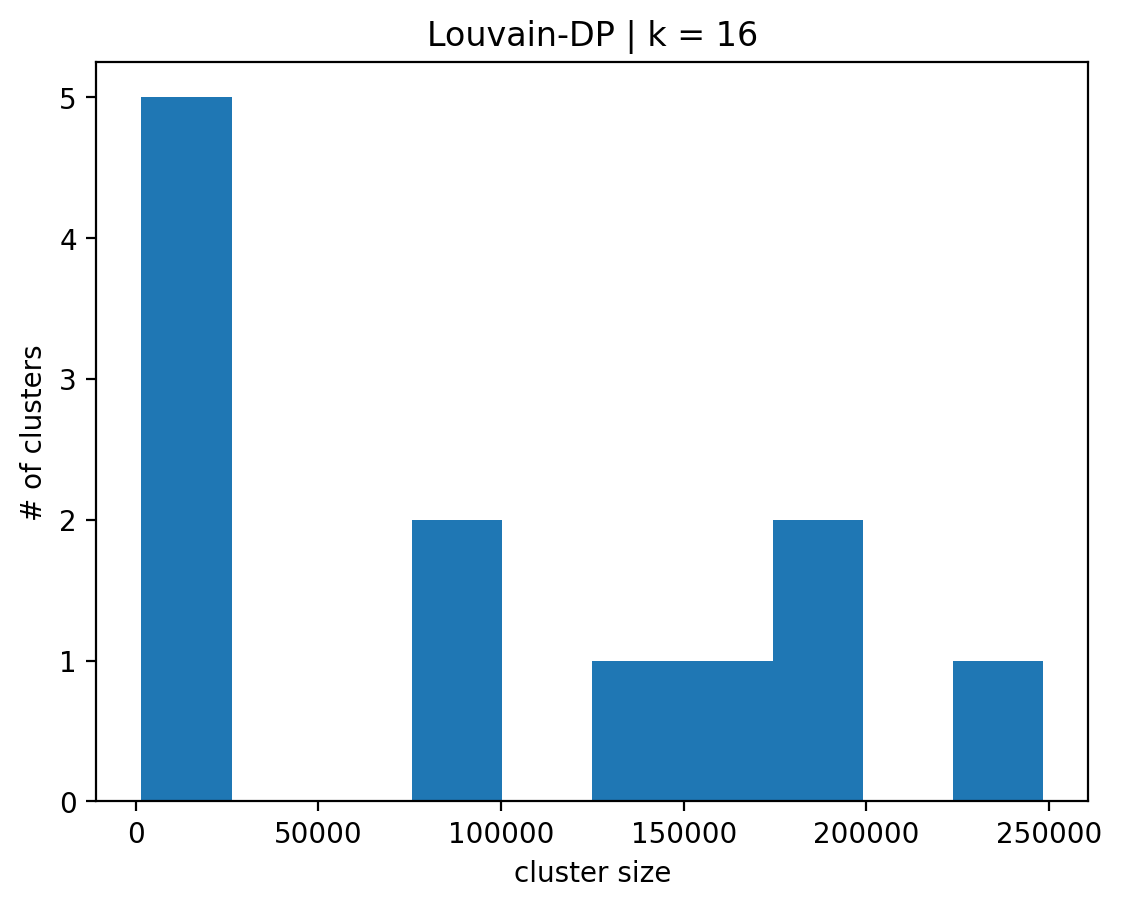

k: 32
epsilon 6.971023143950696
number of clusters: 9
largest: 255713
smallest: 98
mean cluster size: 126098.89
standard deviation: 102944.22


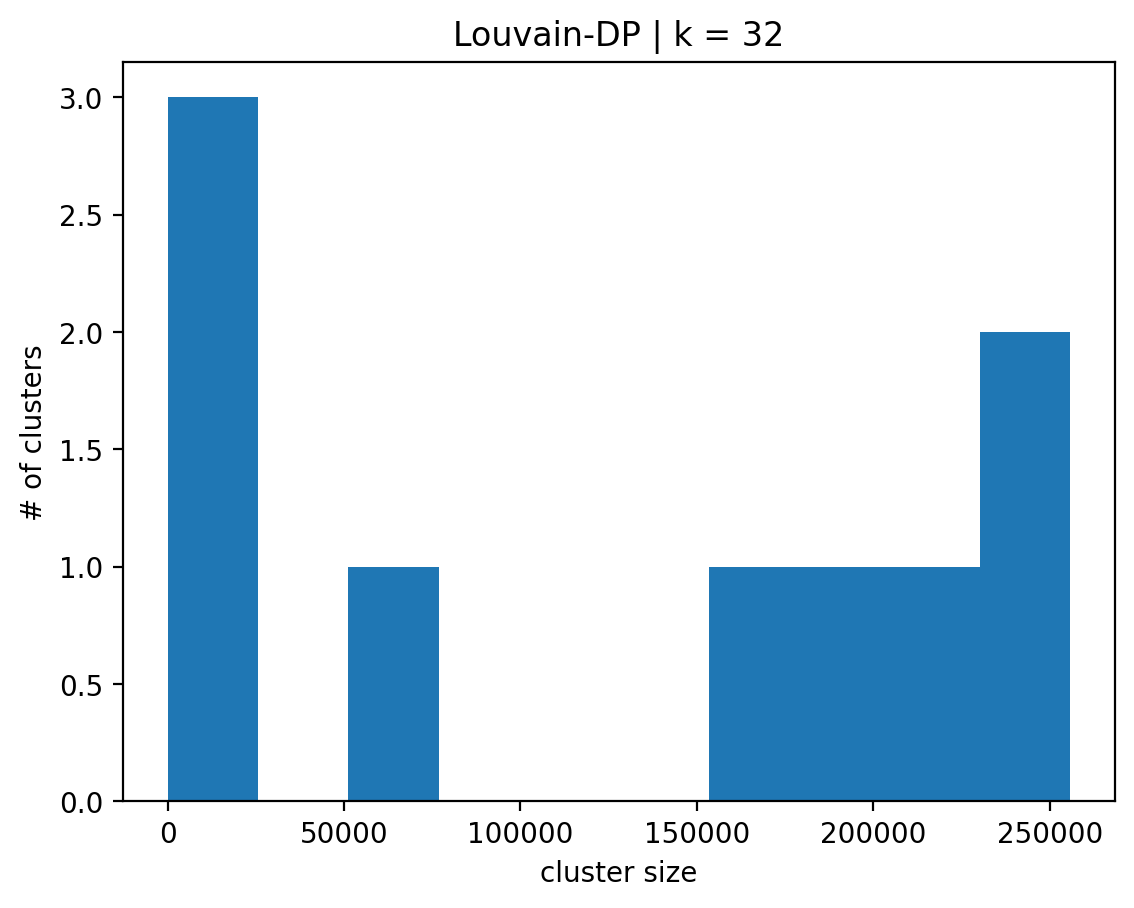

k: 64
epsilon 6.971023143950696
number of clusters: 5
largest: 273028
smallest: 186952
mean cluster size: 226978.0
standard deviation: 28400.66


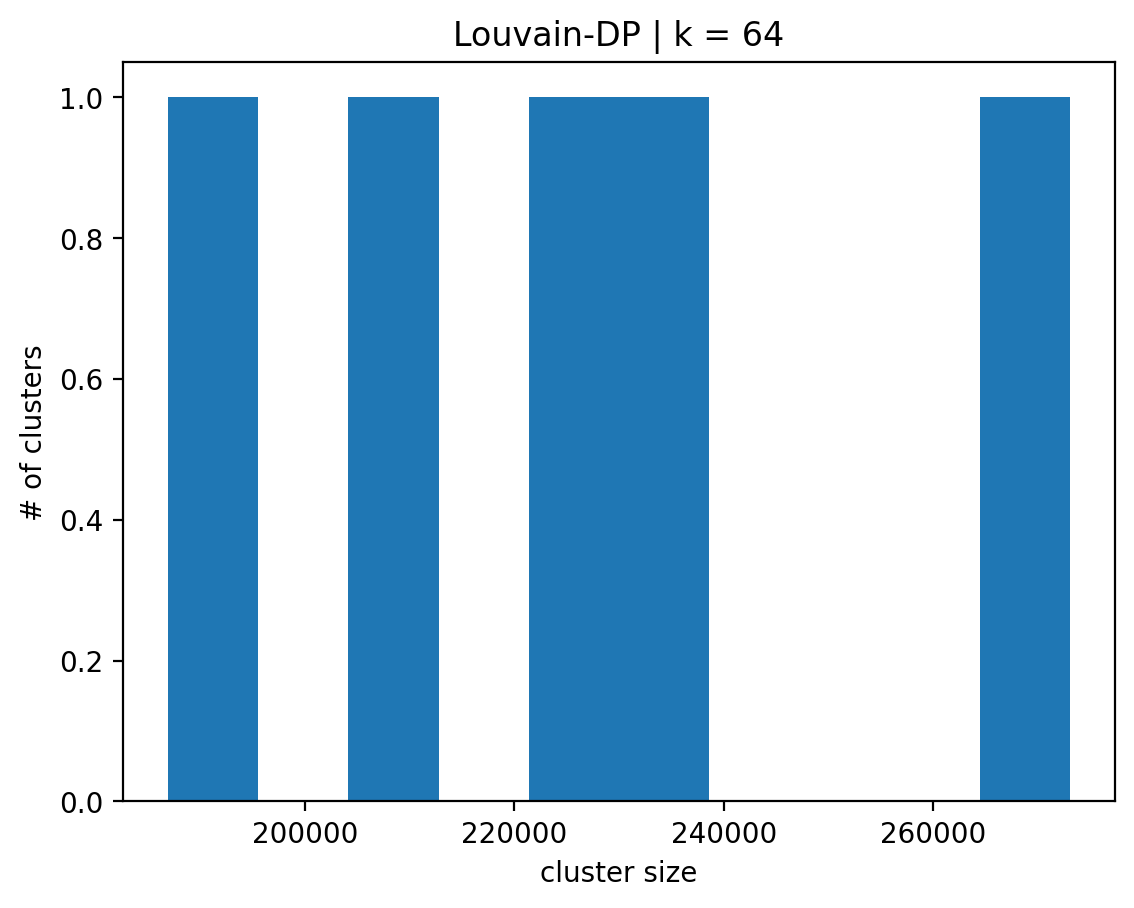

In [26]:
method = LouvainDP(G)
mod = []
for val in k:
    dp_communities, epsilon = method.louvain_dp(val)
    mod.append(modularity(G, dp_communities))
    cluster_analysis(dp_communities, f"Louvain-DP | k = {val}", val, epsilon)

In [27]:
# evaluation of louvain clusters.
print("Modularity of Louvain Communitites:",modularity(G, true_label_communities),"\n")
for i in range(len(mod)):
        print("Modularity of Louvain-DP communities:",mod[i],"\t| k:",k[i])

Modularity of Louvain Communitites: 0.7208688227909387 

Modularity of Louvain-DP communities: 0.3294751243922849 	| k: 4
Modularity of Louvain-DP communities: 0.2421300534912066 	| k: 8
Modularity of Louvain-DP communities: 0.18664681777373143 	| k: 16
Modularity of Louvain-DP communities: 0.1405127165608195 	| k: 32
Modularity of Louvain-DP communities: 0.09256757075507879 	| k: 64
